In [1]:
from astropy.io import fits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.family':'cmr10','font.size': 13})
matplotlib.rcParams['axes.unicode_minus']=False
matplotlib.rcParams['axes.labelsize']=15
plt.rcParams['figure.figsize']=(4,4)
plt.rcParams['figure.dpi'] = 80
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['mathtext.rm'] = 'serif'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True


data = np.load('test_set_500k_ggt13tcut.npz')

print(data['arr_0'])
data_cols = ['source_id', 'l', 'b', 'ra', 'dec', 'parallax', 'parallax_error',
                  'pmra', 'pmra_error', 'pmdec','pmdec_error', 'radial_velocity',
                  'phot_g_mean_mag', 'phot_bp_mean_mag', 'phot_rp_mean_mag',
             'feh','teff']
data =  data['arr_0']    
data = pd.DataFrame(data, columns=data_cols)
data.head()

data2 = np.load('training_set_glt13.npz')
data2 = data2['arr_0']
data_cols = ['source_id', 'l', 'b', 'ra', 'dec', 'parallax', 'parallax_error',
             'pmra', 'pmra_error', 'pmdec', 'pmdec_error', 'radial_velocity',
             'photo_g_mean_mag', 'photo_bp_mean_mag', 'photo_rp_mean_mag',
             'x','y','z','vx','vy','vz','r','phi','theta','vr','vphi','vtheta']
data2 = pd.DataFrame(data2, columns=data_cols)
data2.head()


['source_id', 'l', 'b', 'ra', 'dec', 'parallax', 'parallax_error',
                  'pmra', 'pmra_error', 'pmdec','pmdec_error', 'radial_velocity',
                  'phot_g_mean_mag', 'phot_bp_mean_mag', 'phot_rp_mean_mag',
                  'feh','teff']

In [2]:
# Open FITS file
file = fits.open('/tigress/ljchang/DataXGaia/data/galaxia_mock/new_processed/processed_stars_reshuffled.fits')
# Print the fields in the file
file[1].header
# Access data field
source_id= file[1].data['source_id']
l= file[1].data['l']
b= file[1].data['b']
ra= file[1].data['ra']
dec= file[1].data['dec']
pmra= file[1].data['pmra']
pmra_error= file[1].data['pmra_error']
pmdec= file[1].data['pmdec']
pmdec_error= file[1].data['pmdec_error']
parallax= file[1].data['parallax']
parallax_error= file[1].data['parallax_error']
radial_velocity= file[1].data['radial_velocity']
phot_g_mean_mag= file[1].data['phot_g_mean_mag']
phot_bp_mean_mag= file[1].data['phot_bp_mean_mag']
phot_rp_mean_mag= file[1].data['phot_rp_mean_mag']
feh = file[1].data['feh']
teff = file[1].data['teff']

# Close file when done (see note)
file.close()

In [3]:
import pandas as pd
data_cols = ['source_id', 'l', 'b', 'ra', 'dec', 'parallax', 'parallax_error',
                  'pmra', 'pmra_error', 'pmdec','pmdec_error', 'radial_velocity',
                  'phot_g_mean_mag', 'phot_bp_mean_mag', 'phot_rp_mean_mag',
                  'feh','teff']
data = np.array([source_id, l, b, ra, dec, parallax, parallax_error,
                  pmra, pmra_error, pmdec, pmdec_error, radial_velocity,
                  phot_g_mean_mag, phot_bp_mean_mag, phot_rp_mean_mag,
                  feh,teff]).T
dataset = pd.DataFrame(data, columns=data_cols)

In [4]:
dataset.head()


,source_id,l,b,ra,dec,parallax,parallax_error,pmra,pmra_error,pmdec,pmdec_error,radial_velocity,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,feh,teff
0,2.476898e+17,151.497742,-0.630378,62.229865,50.948900,1.192030,0.028991,1.94082,0.017164,-3.739820,0.017932,-30.209801,14.720700,15.234500,14.035800,-0.098296,6329.740234
1,5.241916e+18,289.491119,-2.769778,162.725741,-62.453407,0.450190,0.036374,-7.26158,0.019111,0.364657,0.017193,-7.533750,14.532300,14.816300,14.095200,-0.037709,6331.830078
2,6.000764e+18,330.825226,11.698111,231.400029,-42.671864,0.292917,0.015883,-9.16757,0.010125,-6.180620,0.010277,-15.955300,13.511800,14.146300,12.744800,-0.210751,4784.089844
3,6.106543e+18,325.708282,20.857212,219.867896,-37.190580,0.972064,0.089374,-13.06870,0.060293,-1.422840,0.061421,-64.101402,17.023199,17.721800,16.209801,0.073266,4578.350098
4,3.898392e+17,121.752747,-15.701139,11.190011,47.155318,1.319590,0.112639,2.24323,0.055817,-2.482230,0.053249,-61.350700,16.815800,17.535101,15.986600,-0.412926,4401.430176


In [5]:
dataset_1 = dataset.sample(frac=1)

In [6]:
dataset_1.index.values

array([46822774, 41301180, 30086661, ..., 19088228, 52890241, 65708862])

In [7]:
dataset_1.head()

,source_id,l,b,ra,dec,parallax,parallax_error,pmra,pmra_error,pmdec,pmdec_error,radial_velocity,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,feh,teff
46822774,5.914462e+18,328.834320,-11.309388,254.868168,-60.980630,0.998705,0.036245,-4.586310,0.021122,-13.69420,0.017006,21.758801,14.3360,14.781400,13.7266,0.176565,5917.459961
41301180,1.156915e+18,6.704409,49.930496,228.317718,5.495211,0.343313,0.018797,-6.484580,0.009876,-3.85104,0.008885,-57.261799,13.1190,13.660300,12.4225,-0.486480,4663.359863
30086661,4.513263e+18,49.668587,3.225806,287.703194,16.352466,0.819692,0.071872,-0.588786,0.029700,-3.16830,0.034065,2.494020,16.1497,16.758400,15.3925,0.252375,5698.740234
70605698,6.774500e+18,5.326343,-41.700169,316.139735,-37.680059,4.479140,0.160355,8.861660,0.102224,-31.45550,0.103759,-14.161500,17.9175,19.280500,16.7435,-0.468072,3296.600098
36329668,4.571215e+18,43.611843,33.077805,256.115501,22.772265,0.879570,0.051279,9.283640,0.034594,-7.36869,0.035241,13.993900,15.9999,16.472401,15.3718,-0.071505,5178.189941


In [8]:
np.savetxt("indices_shuffled_largeset.npy", dataset_1.index.values)

In [9]:
dataset_1 = dataset_1.reset_index(drop=True)

In [10]:
dataset_1.head()

,source_id,l,b,ra,dec,parallax,parallax_error,pmra,pmra_error,pmdec,pmdec_error,radial_velocity,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,feh,teff
0,5.914462e+18,328.834320,-11.309388,254.868168,-60.980630,0.998705,0.036245,-4.586310,0.021122,-13.69420,0.017006,21.758801,14.3360,14.781400,13.7266,0.176565,5917.459961
1,1.156915e+18,6.704409,49.930496,228.317718,5.495211,0.343313,0.018797,-6.484580,0.009876,-3.85104,0.008885,-57.261799,13.1190,13.660300,12.4225,-0.486480,4663.359863
2,4.513263e+18,49.668587,3.225806,287.703194,16.352466,0.819692,0.071872,-0.588786,0.029700,-3.16830,0.034065,2.494020,16.1497,16.758400,15.3925,0.252375,5698.740234
3,6.774500e+18,5.326343,-41.700169,316.139735,-37.680059,4.479140,0.160355,8.861660,0.102224,-31.45550,0.103759,-14.161500,17.9175,19.280500,16.7435,-0.468072,3296.600098
4,4.571215e+18,43.611843,33.077805,256.115501,22.772265,0.879570,0.051279,9.283640,0.034594,-7.36869,0.035241,13.993900,15.9999,16.472401,15.3718,-0.071505,5178.189941


In [11]:
dataset_1['z'] = np.sin(dataset_1['b'].astype(float))/dataset_1['parallax'].astype(float)

In [12]:
dataset_1.head()

,source_id,l,b,ra,dec,parallax,parallax_error,pmra,pmra_error,pmdec,pmdec_error,radial_velocity,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,feh,teff,z
0,3.109144e+18,215.563477,1.622674,105.504459,-1.600681,0.235647,0.016013,0.160527,0.008675,-0.521934,0.009374,41.128201,13.3846,14.196200,12.483800,-0.209980,4475.620117,4.237926
1,4.193384e+18,29.445082,-15.566564,295.299962,-10.050132,0.279511,0.015039,-1.203630,0.010146,-3.743360,0.010335,92.219597,13.4500,14.042800,12.706100,-1.032570,4834.899902,-0.504198
2,3.094860e+18,217.523956,19.135105,121.966330,4.712399,1.338000,0.011422,-8.367850,0.006001,-4.144400,0.005399,30.309200,11.6283,11.777300,11.372400,-0.219660,7325.310059,0.210526
3,1.806550e+18,54.618912,-10.624259,302.709165,13.837905,0.815102,0.033970,1.347440,0.022916,-1.126030,0.023345,-15.372000,15.1756,15.563900,14.628700,-0.008975,5962.490234,1.143232
4,2.535164e+17,158.832214,-1.624067,68.921148,45.049052,2.945930,0.242182,14.942400,0.093169,-34.196098,0.120521,12.302200,18.3083,19.641701,17.153999,-0.697354,3552.810059,-0.338970


idx_rvcut = np.where(((dataset_1.radial_velocity < 550) & (dataset_1.radial_velocity > -550)) &((dataset_1.z < -2) | (dataset_1.z > 2)))




In [11]:
idx_rvcut = np.where((dataset_1.radial_velocity < 550) & (dataset_1.radial_velocity > -550))

In [12]:
print(np.shape(idx_rvcut))

(1, 75184929)


In [13]:
dataset_rvcut = dataset_1.loc[idx_rvcut]
print(dataset_rvcut.shape)

(75184929, 17)


In [14]:
dataset_rvcut.head()

,source_id,l,b,ra,dec,parallax,parallax_error,pmra,pmra_error,pmdec,pmdec_error,radial_velocity,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,feh,teff
0,5.914462e+18,328.834320,-11.309388,254.868168,-60.980630,0.998705,0.036245,-4.586310,0.021122,-13.69420,0.017006,21.758801,14.3360,14.781400,13.7266,0.176565,5917.459961
1,1.156915e+18,6.704409,49.930496,228.317718,5.495211,0.343313,0.018797,-6.484580,0.009876,-3.85104,0.008885,-57.261799,13.1190,13.660300,12.4225,-0.486480,4663.359863
2,4.513263e+18,49.668587,3.225806,287.703194,16.352466,0.819692,0.071872,-0.588786,0.029700,-3.16830,0.034065,2.494020,16.1497,16.758400,15.3925,0.252375,5698.740234
3,6.774500e+18,5.326343,-41.700169,316.139735,-37.680059,4.479140,0.160355,8.861660,0.102224,-31.45550,0.103759,-14.161500,17.9175,19.280500,16.7435,-0.468072,3296.600098
4,4.571215e+18,43.611843,33.077805,256.115501,22.772265,0.879570,0.051279,9.283640,0.034594,-7.36869,0.035241,13.993900,15.9999,16.472401,15.3718,-0.071505,5178.189941


In [15]:
dataset_rvcut = dataset_rvcut.reset_index(drop=True)

In [16]:
data_train = dataset_rvcut.loc[0:1999999]

In [17]:
data_train.head()
data_train.shape

(2000000, 17)

In [18]:
data_val = dataset_rvcut.loc[2000000:3999999]
data_val.head()
data_val.shape

(2000000, 17)

In [19]:
data_test = dataset_rvcut.loc[4000000:5999999]
data_test.head()
data_test.shape

(2000000, 17)

In [20]:
np.savez('training_set_500k_2mil.npz', data_train.to_numpy() )
np.savez('validation_set_500k_2mil.npz', data_val.to_numpy() )
np.savez('test_set_500k_2mil.npz', data_test.to_numpy() )

In [18]:
idx_lt13 = np.where((dataset_1.phot_g_mean_mag < 13.0) & (dataset_1.teff > 3550) & (dataset_1.teff < 6900)& (dataset_1.radial_velocity < 550) & (dataset_1.radial_velocity > -550))
data_Glt13 = dataset_1.loc[idx_lt13]
#data_train_Glt13 = data_train_Glt13.loc[0:499999,:]
#print(data_train_Glt13.shape)
data_train_Glt13 = data_Glt13.iloc[:500000,:].reset_index(drop=True)
data_train_Glt13.head()
data_val_Glt13 = data_Glt13.iloc[500000:1000000,:].reset_index(drop=True)
print(data_val_Glt13.shape)
data_val_Glt13.head()
idx_gt13 = np.where((dataset_1.phot_g_mean_mag >= 13.0) & ((dataset_1.teff > 3550) | (dataset_1.teff < 6900))&(dataset_1.radial_velocity < 550) & (dataset_1.radial_velocity > -550))
data_test_Ggt13 = dataset_1.loc[idx_gt13].iloc[:500000,:].reset_index(drop=True)
print(data_test_Ggt13.shape)

(500000, 17)
(500000, 17)


In [19]:
data_val_Glt13.head()

,source_id,l,b,ra,dec,parallax,parallax_error,pmra,pmra_error,pmdec,pmdec_error,radial_velocity,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,feh,teff
0,6.631567e+18,332.518860,-23.129087,280.959294,-62.979622,2.53891,0.008303,8.235020,0.004916,-14.965700,0.005136,4.110860,11.2406,11.5257,10.8000,-0.314743,6491.729980
1,5.639844e+18,253.653290,4.075119,128.321674,-33.143598,0.38337,0.013722,-3.846510,0.007209,2.623760,0.006486,40.141102,12.4480,13.0800,11.6809,-0.086842,4977.009766
2,3.657258e+18,329.888641,56.090778,207.539322,-3.676813,1.88356,0.008922,-39.197201,0.004262,-54.796902,0.004892,26.545401,11.4759,11.9141,10.8706,-0.622465,5097.069824
3,5.034403e+18,200.441605,-87.752296,15.314327,-26.620815,4.18966,0.010810,64.718002,0.006400,-10.130400,0.006687,12.620900,12.6351,13.1074,12.0073,-0.047495,5246.410156
4,5.078944e+18,211.657562,-61.743324,43.826690,-23.096203,2.16781,0.013629,13.586900,0.008278,21.018700,0.006261,8.576360,12.2138,12.4797,11.7973,-0.108839,6286.540039


In [20]:
np.savez('training_set_500k_glt13tcutsame.npz', data_train_Glt13.to_numpy() )
np.savez('validation_set_500k_glt13tcutsame.npz', data_val_Glt13.to_numpy() )
np.savez('test_set_500k_ggt13tcutsame.npz', data_test_Ggt13.to_numpy() )

data_val_Glt13 = data_val[data_val.photo_g_mean_mag < 13.0]
data_val_Ggt13 = data_val[data_val.photo_g_mean_mag >= 13.0]
print(data_val_Glt13.shape)
print(data_val_Ggt13.shape)
data_test_Glt13 = data_test[data_test.photo_g_mean_mag < 13.0]
data_test_Ggt13 = data_test[data_test.photo_g_mean_mag >= 13.0]
print(data_test_Glt13.shape)
print(data_test_Ggt13.shape)

### Velocity Ellipsoid

In [1]:
from astropy.io import fits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams.update({'font.family':'cmr10','font.size': 13})
matplotlib.rcParams['axes.unicode_minus']=False
matplotlib.rcParams['axes.labelsize']=15
plt.rcParams['figure.figsize']=(4,4)



plt.rcParams['figure.dpi'] = 80
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['mathtext.rm'] = 'serif'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True


In [2]:
ellipse_df = np.load('/tigress/dropulic/G_train_2it_500000_tanh_D30_nodropout_seed1test1_lbppp_log2d_highz/ellipse_df.npz')
metallicity_df = np.load('/tigress/dropulic/test_set_500k_highz.npz')

In [3]:
ellipse_df = ellipse_df['arr_0']
metallicity_df = metallicity_df['arr_0']

In [8]:
print(ellipse_df)

[[ 2.29825850e+01 -1.49901362e+01 -2.04198630e+02 ... -1.81926867e+02
  -3.66938996e+00 -2.69235000e-02]
 [ 1.11001506e+01  2.04183179e+00 -2.13163297e+02 ... -2.53609120e+02
   2.14512005e+01 -4.76251006e-01]
 [-4.13363610e+01 -5.26181968e+00 -2.11625155e+02 ... -1.88486531e+02
  -9.65165043e+00  1.06907003e-01]
 ...
 [-3.15372456e+00 -1.52808095e+01 -2.16290024e+02 ... -1.97856005e+02
  -3.28899994e+01 -2.95825988e-01]
 [-7.39512926e+01  3.28788079e+01 -2.64566191e+02 ... -2.40046714e+02
   3.51626015e+01 -1.99064001e-01]
 [ 1.00698735e+01  1.27486812e+01 -1.96586499e+02 ... -1.93365349e+02
   6.02864990e+01 -4.20296013e-01]]


In [9]:
data_cols_vel_ellipse = ['vr_pred','vth_pred','vphi_pred','sigma_vr','sigma_vth','sigma_vphi','vlos_pred','sigma_los','vr_true','vth_true','vphi_true', 'vlos_true','feh']
ellipse_df = pd.DataFrame(ellipse_df, columns=data_cols_vel_ellipse)

In [11]:
data_cols_met = data_cols = ['source_id', 'l', 'b', 'ra', 'dec', 'parallax', 'parallax_error',
                  'pmra', 'pmra_error', 'pmdec','pmdec_error', 'radial_velocity',
                  'phot_g_mean_mag', 'phot_bp_mean_mag', 'phot_rp_mean_mag',
             'feh','teff','z']
metallicity_df = pd.DataFrame(metallicity_df, columns=data_cols_met)

In [12]:
metallicity_df.head()

,source_id,l,b,ra,dec,parallax,parallax_error,pmra,pmra_error,pmdec,pmdec_error,radial_velocity,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,feh,teff,z
0,5.846577e+18,310.405487,-7.719532,214.284491,-69.338307,0.309058,0.021302,-7.62952,0.011539,-2.488400,0.012469,-3.66939,13.9913,14.788800,13.0998,-0.026924,4701.069824,-3.206438
1,2.106567e+18,73.783722,17.425959,284.291787,43.787249,0.411263,0.015796,-1.32238,0.009705,-3.885410,0.007255,21.45120,12.4915,12.988500,11.8356,-0.476251,4932.009766,-2.405239
2,4.515004e+18,52.003265,1.661335,290.285036,17.691807,0.449015,0.041422,-3.91574,0.027944,-7.916820,0.028467,-9.65165,15.5305,16.966999,14.3051,0.106907,4868.589844,2.217975
3,5.241758e+17,123.592926,1.605499,14.392693,64.469375,0.433992,0.019560,3.39957,0.013196,-1.915650,0.013443,-26.90440,13.9892,14.961100,12.9852,-0.319257,4824.060059,2.302803
4,6.735313e+18,1.435492,-14.551746,282.375522,-34.376075,0.141272,0.011583,-1.97611,0.007384,-0.349193,0.007495,14.44420,12.8253,13.775200,11.8551,-0.540112,3896.620117,-6.478891


In [13]:
ellipse_df.head()

,vr_pred,vth_pred,vphi_pred,sigma_vr,sigma_vth,sigma_vphi,vlos_pred,sigma_los,vr_true,vth_true,vphi_true,vlos_true,feh
0,22.982585,-14.990136,-204.198630,11.438610,5.997413,36.362738,-27.304304,38.588333,15.976567,-11.316789,-181.926867,-3.66939,-0.026924
1,11.100151,2.041832,-213.163297,1.397688,10.669427,34.323868,-20.935621,35.971073,12.747128,-10.530578,-253.609120,21.45120,-0.476251
2,-41.336361,-5.261820,-211.625155,10.656084,0.874323,24.910550,15.528259,27.108154,-31.438261,-4.449689,-188.486531,-9.65165,0.106907
3,44.350429,13.919185,-190.219683,28.692690,0.925188,28.406533,-28.160246,40.386353,45.242651,13.890415,-191.103007,-26.90440,-0.319257
4,-85.501879,70.783195,-223.430813,28.478714,85.435487,15.180833,115.320526,91.327522,-54.045557,-23.585048,-206.662739,14.44420,-0.540112


In [10]:
ellipse_df['feh'] = metallicity_df['feh'].astype(float)

In [11]:
ellipse_df.head()

,vr_pred,vth_pred,vphi_pred,sigma_vr,sigma_vth,sigma_vphi,vlos_pred,sigma_los,vr_true,vth_true,vphi_true,vlos_true,feh
0,51.535872,5.274182,-230.772845,19.711855,0.882922,19.200173,70.439049,27.531498,53.799321,5.375565,-228.568150,73.600403,-0.160673
1,-45.147751,20.374338,-264.505507,48.767793,7.081722,23.135972,5.200496,54.440071,2.875647,13.400712,-287.288331,-48.408600,0.034293
2,31.480199,-16.716381,-193.435648,21.048649,11.911836,30.064304,-43.184025,38.584969,28.529716,-18.386116,-197.649895,-37.775398,0.008441
3,8.549384,1.969544,-218.312524,9.561110,15.737422,11.463313,1.449659,21.690754,7.233140,-0.196972,-216.734411,-1.536430,-0.063593
4,10.773447,-29.572602,-228.155066,1.667597,10.773932,37.913040,-15.296363,39.449425,7.363406,-7.541170,-305.682803,65.373100,-0.349499


ellipse_df['z'] = np.sin(metallicity_df['b'].astype(float))/metallicity_df['parallax'].astype(float)

In [14]:
ellipse_df['z'] = metallicity_df['z']

In [15]:
ellipse_df['l'] = metallicity_df['l'].astype(float)
ellipse_df['b'] = metallicity_df['b'].astype(float)
ellipse_df['ra'] = metallicity_df['ra'].astype(float)
ellipse_df['dec'] = metallicity_df['dec'].astype(float)
ellipse_df['parallax'] = metallicity_df['parallax'].astype(float)
ellipse_df['pmra'] = metallicity_df['pmra'].astype(float)
ellipse_df['pmdec'] = metallicity_df['pmdec'].astype(float)

In [16]:
ellipse_df.head()

,vr_pred,vth_pred,vphi_pred,sigma_vr,sigma_vth,sigma_vphi,vlos_pred,sigma_los,vr_true,vth_true,...,vlos_true,feh,z,l,b,ra,dec,parallax,pmra,pmdec
0,22.982585,-14.990136,-204.198630,11.438610,5.997413,36.362738,-27.304304,38.588333,15.976567,-11.316789,...,-3.66939,-0.026924,-3.206438,310.405487,-7.719532,214.284491,-69.338307,0.309058,-7.62952,-2.488400
1,11.100151,2.041832,-213.163297,1.397688,10.669427,34.323868,-20.935621,35.971073,12.747128,-10.530578,...,21.45120,-0.476251,-2.405239,73.783722,17.425959,284.291787,43.787249,0.411263,-1.32238,-3.885410
2,-41.336361,-5.261820,-211.625155,10.656084,0.874323,24.910550,15.528259,27.108154,-31.438261,-4.449689,...,-9.65165,0.106907,2.217975,52.003265,1.661335,290.285036,17.691807,0.449015,-3.91574,-7.916820
3,44.350429,13.919185,-190.219683,28.692690,0.925188,28.406533,-28.160246,40.386353,45.242651,13.890415,...,-26.90440,-0.319257,2.302803,123.592926,1.605499,14.392693,64.469375,0.433992,3.39957,-1.915650
4,-85.501879,70.783195,-223.430813,28.478714,85.435487,15.180833,115.320526,91.327522,-54.045557,-23.585048,...,14.44420,-0.540112,-6.478891,1.435492,-14.551746,282.375522,-34.376075,0.141272,-1.97611,-0.349193


In [15]:
data_cols_vel_ellipse_met = ['vr_pred','vth_pred','vphi_pred','sigma_vr','sigma_vth','sigma_vphi','vlos_pred','sigma_los','vr_true','vth_true','vphi_true', 'vlos_true','feh']

In [38]:
np.savez('G_train_2it_500000_tanh_D30_nodropout_seed1test1_lbppp_log2d_newtm/ellipse_df_wmet.npz', ellipse_df.to_numpy() )

In [39]:
np.load

<function numpy.load(file, mmap_mode=None, allow_pickle=False, fix_imports=True, encoding='ASCII')>

In [40]:
print(ellipse_df.shape)

(500000, 21)


In [41]:
idx_lowmet_highz = np.where((ellipse_df.feh <= -1.5) & ((ellipse_df.z > 3) | (ellipse_df.z < -3)))
ellipse_df_lowmet_highz = ellipse_df.loc[idx_lowmet_highz]
print(ellipse_df_lowmet_highz.shape)

(141, 21)


In [42]:
idx_lowmet_lowz = np.where((ellipse_df.feh <= -1.5) & ((ellipse_df.z < 3) & (ellipse_df.z > -3)))
ellipse_df_lowmet_lowz = ellipse_df.loc[idx_lowmet_lowz]
print(ellipse_df_lowmet_lowz.shape)

(1226, 21)


In [43]:
idx_highmet_highz = np.where(ellipse_df.feh > -1 & ((ellipse_df.z > 3) | (ellipse_df.z < -3)))
ellipse_df_highmet_highz = ellipse_df.loc[idx_highmet_highz]
print(ellipse_df_highmet_highz.shape)

(157601, 21)


In [20]:
idx_highmet_lowz = np.where(ellipse_df.feh > -1 & ((ellipse_df.z < 3) & (ellipse_df.z > -3)))
ellipse_df_highmet_lowz = ellipse_df.loc[idx_highmet_lowz]
print(ellipse_df_highmet_lowz.shape)

(1624, 14)


from scipy import stats
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
data3=np.vstack((ellipse_df['vr_pred'].values, ellipse_df['vth_pred'].values, ellipse_df['vphi_pred'].values))
data3 = np.transpose(data3)
values = data3.T
kde = stats.gaussian_kde(values)
density = kde(values)



np.save(density,'density_ellipse.npy')

fig = plt.figure(figsize=(12, 12))
ax = fig.gca(projection='3d')
x, y, z = values
surf1 = ax.scatter(x, y, z, c=density)
ax.set_xlabel('$v_{r}$')
ax.set_ylabel('$v_{\theta}$')
ax.set_zlabel('$v_{\phi}$',rotation=0)
ax.view_init(azim=-60, elev=10)
fig.colorbar( surf1, shrink=0.5, aspect=5, label = 'density')
plt.show()

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ellipsoid_fit import ellipsoid_fit, ellipsoid_plot, data_regularize
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

data=np.vstack((ellipse_df['vr_pred'].values, ellipse_df['vth_pred'].values, ellipse_df['vphi_pred'].values))
data = np.transpose(data)
data2=np.vstack((ellipse_df['vr_pred'].values, ellipse_df['vth_pred'].values, ellipse_df['vphi_pred'].values))
data2 = np.transpose(data2)
data_t=np.vstack((ellipse_df['vr_true'].values, ellipse_df['vth_true'].values, ellipse_df['vphi_true'].values))
data_t = np.transpose(data_t)

if __name__=='__main__':
    #data2 = data_regularize(data, divs=8)
    center, evecs, radii, v = ellipsoid_fit(data)
    center_t, evecs_t, radii_t, v = ellipsoid_fit(data_t)
    center_vec = [center[0],center[1], center[2]]
    centert_vec = [center_t[0],center_t[1], center_t[2]]
    print(center)
    print(center_t)
    print(evecs)
    print(radii)
    print('data: ',data)

    data_centered = data 
    data_centered_t = data_t 
    #data_centered = data center.T
    #data_centered = data
    print('data centered: ',data_centered)
    data_centered_regularized = data2 - center.T

    a, b, c = radii
    r = (a * b * c) ** (1. / 3.)
    D = np.array([[r/a, 0., 0.], [0., r/b, 0.], [0., 0., r/c]])
    #http://www.cs.brandeis.edu/~cs155/Lecture_07_6.pdf
    #affine transformation from ellipsoid to sphere (translation excluded)
    TR = evecs.dot(D).dot(evecs.T)
    data_on_sphere = TR.dot(data_centered_regularized.T).T

    fig = plt.figure(figsize=(20, 20))
    ax = fig.add_subplot(221, projection='3d')
    
    #hack  for equal axes
    # ax.set_aspect('equal')
    # for direction in (-1, 1):
    #     for point in np.diag(direction * np.max(data) * np.array([1, 1, 1])):
    #         ax.plot([point[0]], [point[1]], [point[2]], 'w')
        
    ax.scatter(data_centered_t[:,0], data_centered_t[:,1], data_centered_t[:,2], marker='o',s = 5, color='cornflowerblue')
    #ax.scatter(data_centered_t[:,0], data_centered_t[:,1], data_centered_t[:,2], marker='o',s = 5, color='lightcoral',alpha=0.05)
    # ax.scatter(data_centered_regularized[:, 0], data_centered_regularized[:, 1],
    #            data_centered_regularized[:, 2], marker='o', color='b')
    #ax.scatter(data_on_sphere[:, 0], data_on_sphere[:, 1],data_on_sphere[:, 2], s=10, marker='o', color='r')
    #[ -6.71227981,-1.0215267,-79.2893874 ]
    ellipsoid_plot(center_vec, radii, evecs, ax=ax, plot_axes=True, cage_color='black')
    ellipsoid_plot(centert_vec, radii_t, evecs_t, ax=ax, plot_axes=True, cage_color='red')
    #ellipsoid_plot([0,0,0 ], [r, r, r], evecs, ax=ax, plot_axes=True, cage_color='orange')

    #ax.plot([r],[0],[0],color='r',marker='o')
    #ax.plot([radii[0]],[0],[0],color='b',marker='o')
    ax.set_xlabel('$v_{r}$')
    ax.set_ylabel('$v_{\Theta}$')
    ax.set_zlabel('$v_{\phi}$',rotation=0)
    ax.view_init(azim=60, elev=20)
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False
    ax1 = fig.add_subplot(222, projection='3d')
    ax1.scatter(data_centered_t[:,0], data_centered_t[:,1], data_centered_t[:,2], marker='o',s = 5, color='cornflowerblue')
    #ax1.scatter(data_centered_t[:,0], data_centered_t[:,1], data_centered_t[:,2], marker='o',s = 5, color='lightcoral',alpha=0.05)
    # ax.scatter(data_centered_regularized[:, 0], data_centered_regularized[:, 1],
    #            data_centered_regularized[:, 2], marker='o', color='b')
    #ax.scatter(data_on_sphere[:, 0], data_on_sphere[:, 1],data_on_sphere[:, 2], s=10, marker='o', color='r')
    #[ -6.71227981,-1.0215267,-79.2893874 ]
    ellipsoid_plot(center_vec, radii, evecs, ax=ax1, plot_axes=True, cage_color='black')
    ellipsoid_plot(centert_vec, radii_t, evecs_t, ax=ax1, plot_axes=True, cage_color='red')
    #ellipsoid_plot([0,0,0 ], [r, r, r], evecs, ax=ax1, plot_axes=True, cage_color='orange')

    #ax.plot([r],[0],[0],color='r',marker='o')
    #ax.plot([radii[0]],[0],[0],color='b',marker='o')
    ax1.xaxis.pane.fill = False
    #ax1.zaxis.grid(alpha = 0)
    ax1.yaxis.pane.fill = False
    ax1.zaxis.pane.fill = False
    ax1.set_xlabel('$v_{r}$')
    ax1.set_ylabel('$v_{\Theta}$')
    ax1.w_zaxis.line.set_lw(0.)
    ax1.grid(False)
    ax1.xaxis._axinfo["grid"]['linestyle'] = '--'
    ax1.yaxis._axinfo["grid"]['linestyle'] = '--'
    ax1.set_zticks([])

    #ax1.set_zlabel('$v_{\phi}$',rotation=0)
    ax1.view_init(azim=90, elev=90)
    
    ax2 = fig.add_subplot(223, projection='3d')
    ax2.scatter(data_centered_t[:,0], data_centered_t[:,1], data_centered_t[:,2], marker='o',s = 5, color='cornflowerblue')
    #ax2.scatter(data_centered_t[:,0], data_centered_t[:,1], data_centered_t[:,2], marker='o',s = 5, color='lightcoral',alpha=0.05)
    # ax.scatter(data_centered_regularized[:, 0], data_centered_regularized[:, 1],
    #            data_centered_regularized[:, 2], marker='o', color='b')
    #ax.scatter(data_on_sphere[:, 0], data_on_sphere[:, 1],data_on_sphere[:, 2], s=10, marker='o', color='r')
    #[ -6.71227981,-1.0215267,-79.2893874 ]
    ellipsoid_plot(center_vec, radii, evecs, ax=ax2, plot_axes=True, cage_color='black')
    ellipsoid_plot(centert_vec, radii_t, evecs_t, ax=ax2, plot_axes=True, cage_color='red')
    #ellipsoid_plot([0,0,0 ], [r, r, r], evecs, ax=ax1, plot_axes=True, cage_color='orange')

    #ax.plot([r],[0],[0],color='r',marker='o')
    #ax.plot([radii[0]],[0],[0],color='b',marker='o')
    ax2.set_xlabel('$v_{r}$')
    #ax2.set_ylabel('$v_{\Theta}$')
    ax2.xaxis.pane.fill = False
    ax2.yaxis.pane.fill = False
    ax2.zaxis.pane.fill = False
    ax2.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax2.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
    ax2.w_yaxis.line.set_lw(0.)
    ax2.set_yticks([])
    ax2.set_zlabel('$v_{\phi}$',rotation=0)
    ax2.view_init(azim=90, elev=0)
    
    ax3 = fig.add_subplot(224, projection='3d')
    ax3.scatter(data_centered_t[:,0], data_centered_t[:,1], data_centered_t[:,2], marker='o',s = 5, color='cornflowerblue')
    #ax3.scatter(data_centered_t[:,0], data_centered_t[:,1], data_centered_t[:,2], marker='o',s = 5, color='lightcoral',alpha=0.05)
    # ax.scatter(data_centered_regularized[:, 0], data_centered_regularized[:, 1],
    #            data_centered_regularized[:, 2], marker='o', color='b')
    #ax.scatter(data_on_sphere[:, 0], data_on_sphere[:, 1],data_on_sphere[:, 2], s=10, marker='o', color='r')
    #[ -6.71227981,-1.0215267,-79.2893874 ]
    ellipsoid_plot(center_vec, radii, evecs, ax=ax3, plot_axes=True, cage_color='black')
    ellipsoid_plot(centert_vec, radii_t, evecs_t, ax=ax3, plot_axes=True, cage_color='red')
    #ellipsoid_plot([0,0,0 ], [r, r, r], evecs, ax=ax1, plot_axes=True, cage_color='orange')

    #ax.plot([r],[0],[0],color='r',marker='o')
    #ax.plot([radii[0]],[0],[0],color='b',marker='o')
    #ax3.set_xlabel('$v_{r}$', size = 10)
    ax3.xaxis.pane.fill = False
    ax3.yaxis.pane.fill = False
    ax3.zaxis.pane.fill = False
    ax3.set_ylabel('$v_{\Theta}$')
    ax3.set_zlabel('$v_{\phi}$',rotation=0)
    ax3.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax3.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
    ax3.w_xaxis.line.set_lw(0.)
    ax3.set_xticks([])
    ax3.view_init(azim=0, elev=0)
    solid_patch = Line2D([0], [0], color='black', linewidth=3, linestyle='-', label='predicted ellipse')
    dashed_patch = Line2D([0], [0], color='red', linewidth=3, linestyle='-', label='truth ellipse ')
    data_patch = Line2D([0], [0], color='cornflowerblue', linewidth=3, linestyle='-', label='predicted vel')
    plt.legend(handles=[solid_patch,dashed_patch, data_patch], ncol = 1)
    #plt.suptitle("Velocity Ellipsoid, $'feh' > -1 $, 483792 stars")
    plt.suptitle("Velocity Ellipsoid, $'feh' < -1.5 $, 1367 stars")
    #plt.suptitle("Velocity Ellipsoid")
    plt.savefig('/tigress/dropulic/G_train_2it_500000_tanh_D30_nodropout_seed1test1_lbppp_log2d_newtm/ellipse_lowmet.png', transparent = True )
    plt.show()
    

In [50]:
def plot_2dhists_pred(ellipse_df):
    idx_lowmet_highz = np.where((ellipse_df.feh <= -1.5) & ((ellipse_df.z > 1.5) | (ellipse_df.z < -1.5)))
    ellipse_df_lowmet_highz = ellipse_df.loc[idx_lowmet_highz]
    print(ellipse_df_lowmet_highz.shape)
    
    idx_lowmet_lowz = np.where((ellipse_df.feh <= -1.5) & ((ellipse_df.z < 1.5) & (ellipse_df.z > -1.5)))
    ellipse_df_lowmet_lowz = ellipse_df.loc[idx_lowmet_lowz]
    print(ellipse_df_lowmet_lowz.shape)
    
    idx_highmet_highz = np.where((ellipse_df.feh > -1) & ((ellipse_df.z > 1.5) | (ellipse_df.z < -1.5)))
    ellipse_df_highmet_highz = ellipse_df.loc[idx_highmet_highz]
    print(ellipse_df_highmet_highz.shape)
    
    idx_highmet_lowz = np.where((ellipse_df.feh > -1) & ((ellipse_df.z < 1.5) & (ellipse_df.z > -1.5)))
    ellipse_df_highmet_lowz = ellipse_df.loc[idx_highmet_lowz]
    print(ellipse_df_highmet_lowz.shape)
    
    fig, ax = plt.subplots(nrows=3, ncols=4, sharex=False, sharey=False,figsize=(20,15))
    plt.subplots_adjust(wspace = 0.3, hspace = 0.3)
    
    h1 = ax[0,0].hist2d(ellipse_df_highmet_highz['vr_pred'].values,ellipse_df_highmet_highz['vphi_pred'].values, bins=40, norm = LogNorm())
    clb1 = plt.colorbar(h1[3],ax = ax[0,0])
    clb1.set_label('Density', labelpad=-25, y=1.08, rotation=0,fontsize=10)
    ax[0,0].set_xlabel(r'$v_{r}$')
    ax[0,0].set_ylabel('$v_{\phi}$', rotation = 360)
    
    h2 = ax[0,1].hist2d(ellipse_df_highmet_lowz['vr_pred'].values,ellipse_df_highmet_lowz['vphi_pred'].values, bins=40, norm = LogNorm())
    clb2 = plt.colorbar(h2[3],ax = ax[0,1])
    clb2.set_label('Density', labelpad=-25, y=1.08, rotation=0,fontsize=10)
    ax[0,1].set_xlabel(r'$v_{r}$')
    ax[0,1].set_ylabel('$v_{\phi}$', rotation = 360)
    
    h3 = ax[0,2].hist2d(ellipse_df_lowmet_highz['vr_pred'].values,ellipse_df_lowmet_highz['vphi_pred'].values, bins=40, norm = LogNorm())
    clb3 = plt.colorbar(h3[3],ax = ax[0,2])
    clb3.set_label('Density', labelpad=-25, y=1.08, rotation=0,fontsize=10)
    ax[0,2].set_xlabel(r'$v_{r}$')
    ax[0,2].set_ylabel('$v_{\phi}$', rotation = 360)
    
    h4 = ax[0,3].hist2d(ellipse_df_lowmet_lowz['vr_pred'].values,ellipse_df_lowmet_lowz['vphi_pred'].values, bins=40, norm = LogNorm())
    clb4 = plt.colorbar(h4[3],ax = ax[0,3])
    clb4.set_label('Density', labelpad=-25, y=1.08, rotation=0,fontsize=10)
    ax[0,3].set_xlabel(r'$v_{r}$')
    ax[0,3].set_ylabel('$v_{\phi}$', rotation = 360)
    
    h5 = ax[1,0].hist2d(ellipse_df_highmet_highz['vr_pred'].values,ellipse_df_highmet_highz['vth_pred'].values, bins=40, norm = LogNorm())
    clb5 = plt.colorbar(h5[3],ax = ax[1,0])
    clb5.set_label('Density', labelpad=-25, y=1.08, rotation=0,fontsize=10)
    ax[1,0].set_xlabel(r'$v_{r}$')
    ax[1,0].set_ylabel('$v_{\Theta}$', rotation = 360)
    
    h6 = ax[1,1].hist2d(ellipse_df_highmet_lowz['vr_pred'].values,ellipse_df_highmet_lowz['vth_pred'].values, bins=40, norm = LogNorm())
    clb6 = plt.colorbar(h6[3],ax = ax[1,1])
    clb6.set_label('Density', labelpad=-25, y=1.08, rotation=0,fontsize=10)
    ax[1,1].set_xlabel(r'$v_{r}$')
    ax[1,1].set_ylabel('$v_{\Theta}$', rotation = 360)
    
    h7 = ax[1,2].hist2d(ellipse_df_lowmet_highz['vr_pred'].values,ellipse_df_lowmet_highz['vth_pred'].values, bins=40, norm = LogNorm())
    clb7 = plt.colorbar(h7[3],ax = ax[1,2])
    clb7.set_label('Density', labelpad=-25, y=1.08, rotation=0,fontsize=10)
    ax[1,2].set_xlabel(r'$v_{r}$')
    ax[1,2].set_ylabel('$v_{\Theta}$', rotation = 360)
    
    h8 = ax[1,3].hist2d(ellipse_df_lowmet_lowz['vr_pred'].values,ellipse_df_lowmet_lowz['vth_pred'].values, bins=40, norm = LogNorm())
    clb8 = plt.colorbar(h8[3],ax = ax[1,3])
    clb8.set_label('Density', labelpad=-25, y=1.08, rotation=0,fontsize=10)
    ax[1,3].set_xlabel(r'$v_{r}$')
    ax[1,3].set_ylabel('$v_{\Theta}$', rotation = 360)
    #fig.colorbar(h1[3],orientation='vertical',ax=ax[:], shrink=0.5, label = "Density")
    
    h9 = ax[2,0].hist2d(ellipse_df_highmet_highz['vth_pred'].values,ellipse_df_highmet_highz['vphi_pred'].values, bins=40, norm = LogNorm())
    clb9 = plt.colorbar(h9[3],ax = ax[2,0])
    clb9.set_label('Density', labelpad=-25, y=1.08, rotation=0,fontsize=10)
    ax[2,0].set_ylabel(r'$v_{\phi}$', rotation = 360)
    ax[2,0].set_xlabel('$v_{\Theta}$', rotation = 360)
    
    h10 = ax[2,1].hist2d(ellipse_df_highmet_lowz['vth_pred'].values,ellipse_df_highmet_lowz['vphi_pred'].values, bins=40, norm = LogNorm())
    clb10 = plt.colorbar(h10[3],ax = ax[2,1])
    clb10.set_label('Density', labelpad=-25, y=1.08, rotation=0,fontsize=10)
    ax[2,1].set_ylabel(r'$v_{\phi}$', rotation = 360)
    ax[2,1].set_xlabel('$v_{\Theta}$', rotation = 360)
    
    h11 = ax[2,2].hist2d(ellipse_df_lowmet_highz['vth_pred'].values,ellipse_df_lowmet_highz['vphi_pred'].values, bins=40, norm = LogNorm())
    clb11 = plt.colorbar(h11[3],ax = ax[2,2])
    clb11.set_label('Density', labelpad=-25, y=1.08, rotation=0,fontsize=10)
    ax[2,2].set_ylabel(r'$v_{\phi}$', rotation = 360)
    ax[2,2].set_xlabel('$v_{\Theta}$', rotation = 360)
    
    h12 = ax[2,3].hist2d(ellipse_df_lowmet_lowz['vth_pred'].values,ellipse_df_lowmet_lowz['vphi_pred'].values, bins=40, norm = LogNorm())
    clb12 = plt.colorbar(h12[3],ax = ax[2,3])
    clb12.set_label('Density', labelpad=-25, y=1.08, rotation=0,fontsize=10)
    ax[2,3].set_ylabel(r'$v_{\phi}$', rotation = 360)
    ax[2,3].set_xlabel('$v_{\Theta}$', rotation = 360)
    #fig.colorbar(h1[3],orientation='vertical',ax=ax[:], shrink=0.5, label = "Density")
    ax[0,0].set_title("High z ($|z| > 1.5$), High [Fe/H] ($> -1$),\n "+ str(ellipse_df_highmet_highz.shape[0])+" stars")
    ax[0,1].set_title("Low z ($|z| < 1.5$), High [Fe/H] ($> -1$),\n "+ str(ellipse_df_highmet_lowz.shape[0])+" stars")
    ax[0,2].set_title("High z($|z| > 1.5$), Low [Fe/H] ($< -1.5$),\n "+ str(ellipse_df_lowmet_highz.shape[0])+" stars")
    ax[0,3].set_title("Low z ($|z| < 1.5$), Low [Fe/H] ($< -1.5$),\n "+ str(ellipse_df_lowmet_lowz.shape[0])+" stars")
    fig.suptitle('Predicted')
    fig.savefig('G_train_2it_500000_tanh_D30_nodropout_seed1test1_lbppp_log2d_newtm/2dhists_pred_z1p5.png')
    

(350, 21)
(1017, 21)
(54138, 21)
(429654, 21)


Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.


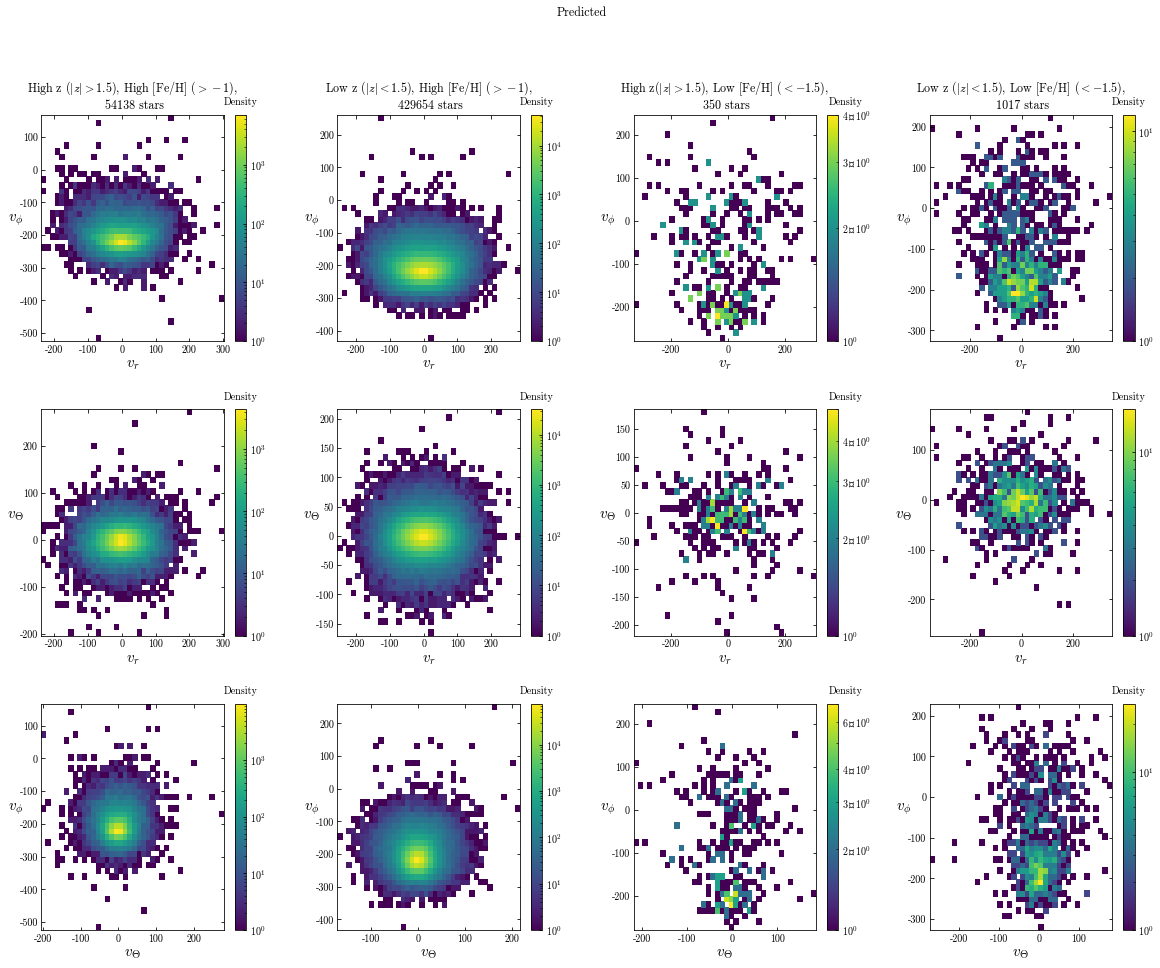

In [51]:
from matplotlib.colors import LogNorm
plot_2dhists_pred(ellipse_df)

In [52]:
def plot_2dhists_true(ellipse_df):
    idx_lowmet_highz = np.where((ellipse_df.feh <= -1.5) & ((ellipse_df.z > 3) | (ellipse_df.z < -3)))
    ellipse_df_lowmet_highz = ellipse_df.loc[idx_lowmet_highz]
    print(ellipse_df_lowmet_highz.shape)
    
    idx_lowmet_lowz = np.where((ellipse_df.feh <= -1.5) & ((ellipse_df.z < 3) & (ellipse_df.z > -3)))
    ellipse_df_lowmet_lowz = ellipse_df.loc[idx_lowmet_lowz]
    print(ellipse_df_lowmet_lowz.shape)
    
    idx_highmet_highz = np.where((ellipse_df.feh > -1) & ((ellipse_df.z > 3) | (ellipse_df.z < -3)))
    ellipse_df_highmet_highz = ellipse_df.loc[idx_highmet_highz]
    print(ellipse_df_highmet_highz.shape)
    
    idx_highmet_lowz = np.where((ellipse_df.feh > -1) & ((ellipse_df.z < 3) & (ellipse_df.z > -3)))
    ellipse_df_highmet_lowz = ellipse_df.loc[idx_highmet_lowz]
    print(ellipse_df_highmet_lowz.shape)
    
    fig, ax = plt.subplots(nrows=3, ncols=4, sharex=False, sharey=False,figsize=(20,15))
    plt.subplots_adjust(wspace = 0.3, hspace = 0.3)
    
    h1 = ax[0,0].hist2d(ellipse_df_highmet_highz['vr_true'].values,ellipse_df_highmet_highz['vphi_true'].values, bins=40, norm = LogNorm())
    clb1 = plt.colorbar(h1[3],ax = ax[0,0])
    clb1.set_label('Density', labelpad=-25, y=1.08, rotation=0,fontsize=10)
    ax[0,0].set_xlabel(r'$v_{r}$')
    ax[0,0].set_ylabel('$v_{\phi}$', rotation = 360)
    
    h2 = ax[0,1].hist2d(ellipse_df_highmet_lowz['vr_true'].values,ellipse_df_highmet_lowz['vphi_true'].values, bins=40, norm = LogNorm())
    clb2 = plt.colorbar(h2[3],ax = ax[0,1])
    clb2.set_label('Density', labelpad=-25, y=1.08, rotation=0,fontsize=10)
    ax[0,1].set_xlabel(r'$v_{r}$')
    ax[0,1].set_ylabel('$v_{\phi}$', rotation = 360)
    
    h3 = ax[0,2].hist2d(ellipse_df_lowmet_highz['vr_true'].values,ellipse_df_lowmet_highz['vphi_true'].values, bins=40, norm = LogNorm())
    clb3 = plt.colorbar(h3[3],ax = ax[0,2])
    clb3.set_label('Density', labelpad=-25, y=1.08, rotation=0,fontsize=10)
    ax[0,2].set_xlabel(r'$v_{r}$')
    ax[0,2].set_ylabel('$v_{\phi}$', rotation = 360)
    
    h4 = ax[0,3].hist2d(ellipse_df_lowmet_lowz['vr_true'].values,ellipse_df_lowmet_lowz['vphi_true'].values, bins=40, norm = LogNorm())
    clb4 = plt.colorbar(h4[3],ax = ax[0,3])
    clb4.set_label('Density', labelpad=-25, y=1.08, rotation=0,fontsize=10)
    ax[0,3].set_xlabel(r'$v_{r}$')
    ax[0,3].set_ylabel('$v_{\phi}$', rotation = 360)
    
    h5 = ax[1,0].hist2d(ellipse_df_highmet_highz['vr_true'].values,ellipse_df_highmet_highz['vth_true'].values, bins=40, norm = LogNorm())
    clb5 = plt.colorbar(h5[3],ax = ax[1,0])
    clb5.set_label('Density', labelpad=-25, y=1.08, rotation=0,fontsize=10)
    ax[1,0].set_xlabel(r'$v_{r}$')
    ax[1,0].set_ylabel('$v_{\Theta}$', rotation = 360)
    
    h6 = ax[1,1].hist2d(ellipse_df_highmet_lowz['vr_true'].values,ellipse_df_highmet_lowz['vth_true'].values, bins=40, norm = LogNorm())
    clb6 = plt.colorbar(h6[3],ax = ax[1,1])
    clb6.set_label('Density', labelpad=-25, y=1.08, rotation=0,fontsize=10)
    ax[1,1].set_xlabel(r'$v_{r}$')
    ax[1,1].set_ylabel('$v_{\Theta}$', rotation = 360)
    
    h7 = ax[1,2].hist2d(ellipse_df_lowmet_highz['vr_true'].values,ellipse_df_lowmet_highz['vth_true'].values, bins=40, norm = LogNorm())
    clb7 = plt.colorbar(h7[3],ax = ax[1,2])
    clb7.set_label('Density', labelpad=-25, y=1.08, rotation=0,fontsize=10)
    ax[1,2].set_xlabel(r'$v_{r}$')
    ax[1,2].set_ylabel('$v_{\Theta}$', rotation = 360)
    
    h8 = ax[1,3].hist2d(ellipse_df_lowmet_lowz['vr_true'].values,ellipse_df_lowmet_lowz['vth_true'].values, bins=40, norm = LogNorm())
    clb8 = plt.colorbar(h8[3],ax = ax[1,3])
    clb8.set_label('Density', labelpad=-25, y=1.08, rotation=0,fontsize=10)
    ax[1,3].set_xlabel(r'$v_{r}$')
    ax[1,3].set_ylabel('$v_{\Theta}$', rotation = 360)
    #fig.colorbar(h1[3],orientation='vertical',ax=ax[:], shrink=0.5, label = "Density")
    
    h9 = ax[2,0].hist2d(ellipse_df_highmet_highz['vth_true'].values,ellipse_df_highmet_highz['vphi_true'].values, bins=40, norm = LogNorm())
    clb9 = plt.colorbar(h9[3],ax = ax[2,0])
    clb9.set_label('Density', labelpad=-25, y=1.08, rotation=0,fontsize=10)
    ax[2,0].set_ylabel(r'$v_{\phi}$', rotation = 360)
    ax[2,0].set_xlabel('$v_{\Theta}$', rotation = 360)
    
    h10 = ax[2,1].hist2d(ellipse_df_highmet_lowz['vth_true'].values,ellipse_df_highmet_lowz['vphi_true'].values, bins=40, norm = LogNorm())
    clb10 = plt.colorbar(h10[3],ax = ax[2,1])
    clb10.set_label('Density', labelpad=-25, y=1.08, rotation=0,fontsize=10)
    ax[2,1].set_ylabel(r'$v_{\phi}$', rotation = 360)
    ax[2,1].set_xlabel('$v_{\Theta}$', rotation = 360)
    
    h11 = ax[2,2].hist2d(ellipse_df_lowmet_highz['vth_true'].values,ellipse_df_lowmet_highz['vphi_true'].values, bins=40, norm = LogNorm())
    clb11 = plt.colorbar(h11[3],ax = ax[2,2])
    clb11.set_label('Density', labelpad=-25, y=1.08, rotation=0,fontsize=10)
    ax[2,2].set_ylabel(r'$v_{\phi}$', rotation = 360)
    ax[2,2].set_xlabel('$v_{\Theta}$', rotation = 360)
    
    h12 = ax[2,3].hist2d(ellipse_df_lowmet_lowz['vth_true'].values,ellipse_df_lowmet_lowz['vphi_true'].values, bins=40, norm = LogNorm())
    clb12 = plt.colorbar(h12[3],ax = ax[2,3])
    clb12.set_label('Density', labelpad=-25, y=1.08, rotation=0,fontsize=10)
    ax[2,3].set_ylabel(r'$v_{\phi}$', rotation = 360)
    ax[2,3].set_xlabel('$v_{\Theta}$', rotation = 360)
    #fig.colorbar(h1[3],orientation='vertical',ax=ax[:], shrink=0.5, label = "Density")
    ax[0,0].set_title("High z ($|z| > 1.5$), High [Fe/H] ($> -1$),\n "+ str(ellipse_df_highmet_highz.shape[0])+" stars")
    ax[0,1].set_title("Low z ($|z| < 1.5$), High [Fe/H] ($> -1$),\n "+ str(ellipse_df_highmet_lowz.shape[0])+" stars")
    ax[0,2].set_title("High z($|z| > 1.5$), Low [Fe/H] ($< -1.5$),\n "+ str(ellipse_df_lowmet_highz.shape[0])+" stars")
    ax[0,3].set_title("Low z ($|z| < 1.5$), Low [Fe/H] ($< -1.5$),\n "+ str(ellipse_df_lowmet_lowz.shape[0])+" stars")
    fig.suptitle('Truth')
    fig.savefig('G_train_2it_500000_tanh_D30_nodropout_seed1test1_lbppp_log2d_newtm/2dhists_truth_z1p5.png')
    

(350, 21)
(1017, 21)
(54138, 21)
(429654, 21)


Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.


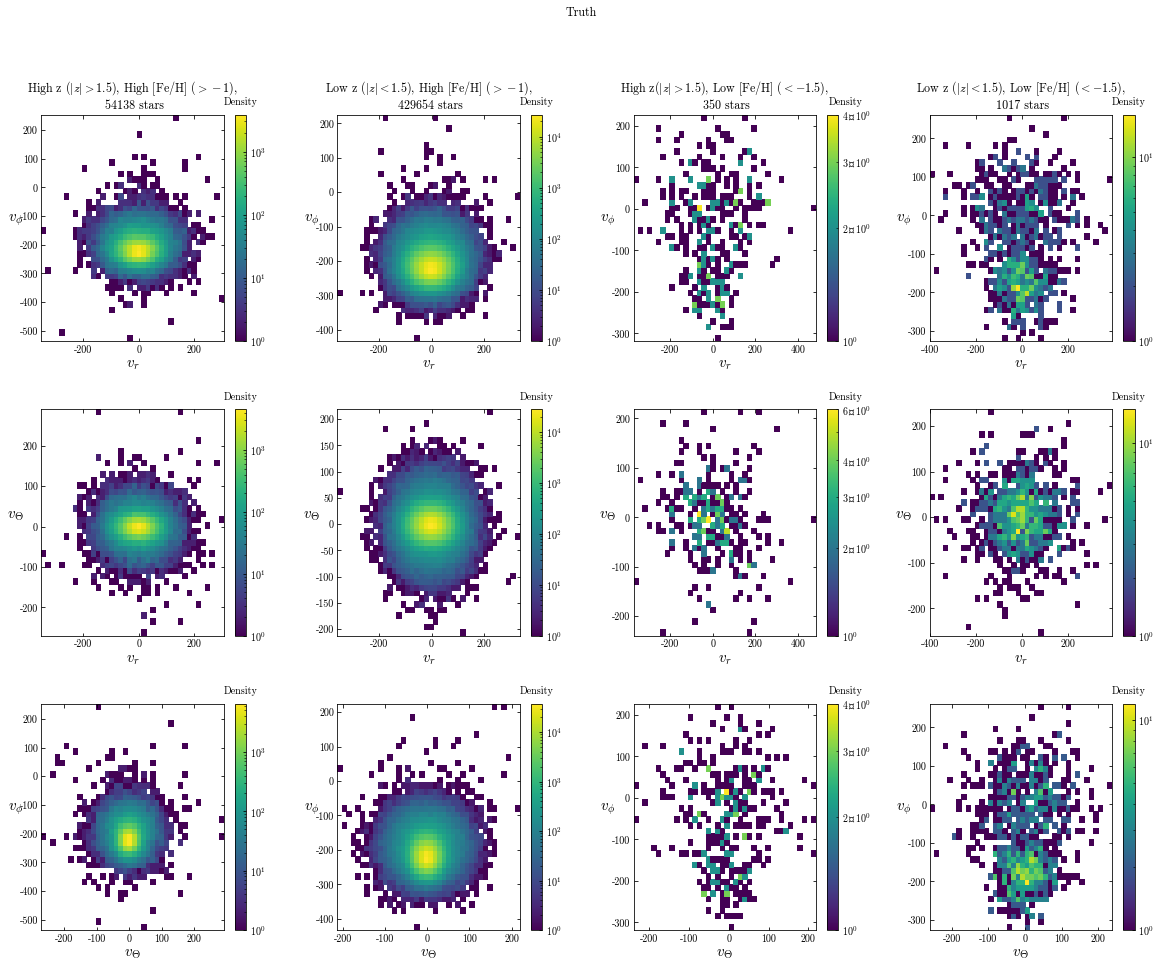

In [53]:
from matplotlib.colors import LogNorm
plot_2dhists_true(ellipse_df)

In [28]:
def plot_2dhists_overlap(ellipse_df):
    idx_lowmet_highz = np.where((ellipse_df.feh <= -1.5) & ((ellipse_df.z > 3) | (ellipse_df.z < -3)))
    ellipse_df_lowmet_highz = ellipse_df.loc[idx_lowmet_highz]
    print(ellipse_df_lowmet_highz.shape)
    
    idx_lowmet_lowz = np.where((ellipse_df.feh <= -1.5) & ((ellipse_df.z < 3) & (ellipse_df.z > -3)))
    ellipse_df_lowmet_lowz = ellipse_df.loc[idx_lowmet_lowz]
    print(ellipse_df_lowmet_lowz.shape)
    
    idx_highmet_highz = np.where((ellipse_df.feh > -1) & ((ellipse_df.z > 3) | (ellipse_df.z < -3)))
    ellipse_df_highmet_highz = ellipse_df.loc[idx_highmet_highz]
    print(ellipse_df_highmet_highz.shape)
    
    idx_highmet_lowz = np.where((ellipse_df.feh > -1) & ((ellipse_df.z < 3) & (ellipse_df.z > -3)))
    ellipse_df_highmet_lowz = ellipse_df.loc[idx_highmet_lowz]
    print(ellipse_df_highmet_lowz.shape)
    
    fig, ax = plt.subplots(nrows=3, ncols=4, sharex=False, sharey=False,figsize=(20,15))
    plt.subplots_adjust(wspace = 0.3, hspace = 0.3)
    
    h1 = ax[0,0].hist2d(ellipse_df_highmet_highz['vr_true'].values,ellipse_df_highmet_highz['vphi_true'].values, bins=40, cmap = "Blues",norm = LogNorm(), alpha = 0.5, range = [[-250, 250], [-450, 250]])
    h1b = ax[0,0].hist2d(ellipse_df_highmet_highz['vr_pred'].values,ellipse_df_highmet_highz['vphi_pred'].values, bins=40, cmap = "Reds",norm = LogNorm(), alpha = 0.5, range = [[-250, 250], [-450, 250]])
    clb1 = plt.colorbar(h1[3],ax = ax[0,0])
    clb1.set_label('Density', labelpad=-25, y=1.08, rotation=0,fontsize=10)
    ax[0,0].set_xlabel(r'$v_{r}$')
    ax[0,0].set_ylabel('$v_{\phi}$', rotation = 360)
    
    h2 = ax[0,1].hist2d(ellipse_df_highmet_lowz['vr_true'].values,ellipse_df_highmet_lowz['vphi_true'].values, bins=40, cmap = "Blues",norm = LogNorm(), alpha = 0.5,range = [[-250, 250], [-450, 250]])
    h2b = ax[0,1].hist2d(ellipse_df_highmet_lowz['vr_pred'].values,ellipse_df_highmet_lowz['vphi_pred'].values, bins=40, cmap = "Reds",norm = LogNorm(), alpha = 0.5, range = [[-250, 250], [-450, 250]])
    clb2 = plt.colorbar(h2[3],ax = ax[0,1])
    clb2.set_label('Density', labelpad=-25, y=1.08, rotation=0,fontsize=10)
    ax[0,1].set_xlabel(r'$v_{r}$')
    ax[0,1].set_ylabel('$v_{\phi}$', rotation = 360)
    
    h3 = ax[0,2].hist2d(ellipse_df_lowmet_highz['vr_true'].values,ellipse_df_lowmet_highz['vphi_true'].values, bins=40, cmap = "Blues",norm = LogNorm(), alpha = 0.5,range = [[-250, 250], [-450, 250]])
    h3b = ax[0,2].hist2d(ellipse_df_lowmet_highz['vr_pred'].values,ellipse_df_lowmet_highz['vphi_pred'].values, bins=40, cmap = "Reds",norm = LogNorm(), alpha = 0.5, range = [[-250, 250], [-450, 250]])
    clb3 = plt.colorbar(h3[3],ax = ax[0,2])
    clb3.set_label('Density', labelpad=-25, y=1.08, rotation=0,fontsize=10)
    ax[0,2].set_xlabel(r'$v_{r}$')
    ax[0,2].set_ylabel('$v_{\phi}$', rotation = 360)
    
    h4 = ax[0,3].hist2d(ellipse_df_lowmet_lowz['vr_true'].values,ellipse_df_lowmet_lowz['vphi_true'].values, bins=40, cmap = "Blues", norm = LogNorm(),alpha = 0.5,range = [[-250, 250], [-450, 250]])
    h4b = ax[0,3].hist2d(ellipse_df_lowmet_lowz['vr_pred'].values,ellipse_df_lowmet_lowz['vphi_pred'].values, bins=40, cmap = "Reds", norm = LogNorm(),alpha = 0.5, range = [[-250, 250], [-450, 250]])
    clb4 = plt.colorbar(h4[3],ax = ax[0,3])
    clb4.set_label('Density', labelpad=-25, y=1.08, rotation=0,fontsize=10)
    ax[0,3].set_xlabel(r'$v_{r}$')
    ax[0,3].set_ylabel('$v_{\phi}$', rotation = 360)
    
    h5 = ax[1,0].hist2d(ellipse_df_highmet_highz['vr_true'].values,ellipse_df_highmet_highz['vth_true'].values, bins=40, cmap = "Blues", norm = LogNorm(),alpha = 0.5,range = [[-250, 250], [-250, 250]])
    h5b = ax[1,0].hist2d(ellipse_df_highmet_highz['vr_pred'].values,ellipse_df_highmet_highz['vth_pred'].values, bins=40, cmap = "Reds",norm = LogNorm(), alpha = 0.5, range = [[-250, 250], [-250, 250]])
    clb5 = plt.colorbar(h5[3],ax = ax[1,0])
    clb5.set_label('Density', labelpad=-25, y=1.08, rotation=0,fontsize=10)
    ax[1,0].set_xlabel(r'$v_{r}$')
    ax[1,0].set_ylabel('$v_{\Theta}$', rotation = 360)
    
    h6 = ax[1,1].hist2d(ellipse_df_highmet_lowz['vr_true'].values,ellipse_df_highmet_lowz['vth_true'].values, bins=40, cmap = "Blues",norm = LogNorm(), alpha = 0.5,range = [[-250, 250], [-250, 250]])
    h6b = ax[1,1].hist2d(ellipse_df_highmet_lowz['vr_pred'].values,ellipse_df_highmet_lowz['vth_pred'].values, bins=40, cmap = "Reds",norm = LogNorm(), alpha = 0.5, range = [[-250, 250], [-250, 250]])
    clb6 = plt.colorbar(h6[3],ax = ax[1,1])
    clb6.set_label('Density', labelpad=-25, y=1.08, rotation=0,fontsize=10)
    ax[1,1].set_xlabel(r'$v_{r}$')
    ax[1,1].set_ylabel('$v_{\Theta}$', rotation = 360)
    
    h7 = ax[1,2].hist2d(ellipse_df_lowmet_highz['vr_true'].values,ellipse_df_lowmet_highz['vth_true'].values, bins=40, cmap = "Blues",norm = LogNorm(), alpha = 0.5,range = [[-250, 250], [-250, 250]])
    h7b = ax[1,2].hist2d(ellipse_df_lowmet_highz['vr_pred'].values,ellipse_df_lowmet_highz['vth_pred'].values, bins=40, cmap = "Reds", norm = LogNorm(),alpha = 0.5, range = [[-250, 250], [-250, 250]])
    clb7 = plt.colorbar(h7[3],ax = ax[1,2])
    clb7.set_label('Density', labelpad=-25, y=1.08, rotation=0,fontsize=10)
    ax[1,2].set_xlabel(r'$v_{r}$')
    ax[1,2].set_ylabel('$v_{\Theta}$', rotation = 360)
    
    h8 = ax[1,3].hist2d(ellipse_df_lowmet_lowz['vr_true'].values,ellipse_df_lowmet_lowz['vth_true'].values, bins=40, cmap = "Blues",norm = LogNorm(), alpha = 0.5,range = [[-250, 250], [-250, 250]])
    h8b = ax[1,3].hist2d(ellipse_df_lowmet_lowz['vr_pred'].values,ellipse_df_lowmet_lowz['vth_pred'].values, bins=40, cmap = "Reds",norm = LogNorm(), alpha = 0.5, range = [[-250, 250], [-250, 250]])
    clb8 = plt.colorbar(h8[3],ax = ax[1,3])
    clb8.set_label('Density', labelpad=-25, y=1.08, rotation=0,fontsize=10)
    ax[1,3].set_xlabel(r'$v_{r}$')
    ax[1,3].set_ylabel('$v_{\Theta}$', rotation = 360)
    #fig.colorbar(h1[3],orientation='vertical',ax=ax[:], shrink=0.5, label = "Density")
    
    h9 = ax[2,0].hist2d(ellipse_df_highmet_highz['vth_true'].values,ellipse_df_highmet_highz['vphi_true'].values, bins=40, cmap = "Blues",norm = LogNorm(), alpha = 0.5,range = [[-250, 250], [-450, 250]])
    h9b = ax[2,0].hist2d(ellipse_df_highmet_highz['vth_pred'].values,ellipse_df_highmet_highz['vphi_pred'].values, bins=40, cmap = "Reds",norm = LogNorm(), alpha = 0.5, range = [[-250, 250], [-450, 250]])
    clb9 = plt.colorbar(h9[3],ax = ax[2,0])
    clb9.set_label('Density', labelpad=-25, y=1.08, rotation=0,fontsize=10)
    ax[2,0].set_ylabel(r'$v_{\phi}$', rotation = 360)
    ax[2,0].set_xlabel('$v_{\Theta}$', rotation = 360)
    
    h10 = ax[2,1].hist2d(ellipse_df_highmet_lowz['vth_true'].values,ellipse_df_highmet_lowz['vphi_true'].values, bins=40, cmap = "Blues", norm = LogNorm(),alpha = 0.5,range = [[-250, 250], [-450, 250]])
    h10b = ax[2,1].hist2d(ellipse_df_highmet_lowz['vth_pred'].values,ellipse_df_highmet_lowz['vphi_pred'].values, bins=40, cmap = "Reds",norm = LogNorm(), alpha = 0.5, range = [[-250, 250], [-450, 250]])
    clb10 = plt.colorbar(h10[3],ax = ax[2,1])
    clb10.set_label('Density', labelpad=-25, y=1.08, rotation=0,fontsize=10)
    ax[2,1].set_ylabel(r'$v_{\phi}$', rotation = 360)
    ax[2,1].set_xlabel('$v_{\Theta}$', rotation = 360)
    
    h11 = ax[2,2].hist2d(ellipse_df_lowmet_highz['vth_true'].values,ellipse_df_lowmet_highz['vphi_true'].values, bins=40, cmap = "Blues",norm = LogNorm(), alpha = 0.5,range = [[-250, 250], [-450, 250]])
    h9b = ax[2,2].hist2d(ellipse_df_lowmet_highz['vth_pred'].values,ellipse_df_lowmet_highz['vphi_pred'].values, bins=40, cmap = "Reds",norm = LogNorm(), alpha = 0.5, range = [[-250, 250], [-450, 250]])
    clb11 = plt.colorbar(h11[3],ax = ax[2,2])
    clb11.set_label('Density', labelpad=-25, y=1.08, rotation=0,fontsize=10)
    ax[2,2].set_ylabel(r'$v_{\phi}$', rotation = 360)
    ax[2,2].set_xlabel('$v_{\Theta}$', rotation = 360)
    
    h12 = ax[2,3].hist2d(ellipse_df_lowmet_lowz['vth_true'].values,ellipse_df_lowmet_lowz['vphi_true'].values, bins=40, cmap = "Blues",norm = LogNorm(), alpha = 0.5,range = [[-250, 250], [-450, 250]])
    h12b = ax[2,3].hist2d(ellipse_df_lowmet_lowz['vth_pred'].values,ellipse_df_lowmet_lowz['vphi_pred'].values, bins=40, cmap = "Reds", norm = LogNorm(),alpha = 0.5, range = [[-250, 250], [-450, 250]])
    clb12 = plt.colorbar(h12[3],ax = ax[2,3])
    clb12.set_label('Density', labelpad=-25, y=1.08, rotation=0,fontsize=10)
    ax[2,3].set_ylabel(r'$v_{\phi}$', rotation = 360)
    ax[2,3].set_xlabel('$v_{\Theta}$', rotation = 360)
    #fig.colorbar(h1[3],orientation='vertical',ax=ax[:], shrink=0.5, label = "Density")
    ax[0,0].set_title("High z, High [Fe/H]")
    ax[0,1].set_title("Low z, High [Fe/H]")
    ax[0,2].set_title("High z, Low [Fe/H]")
    ax[0,3].set_title("Low z, Low [Fe/H]")
    
    

(141, 14)
(1226, 14)
(6271, 14)
(477521, 14)


Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substitutin

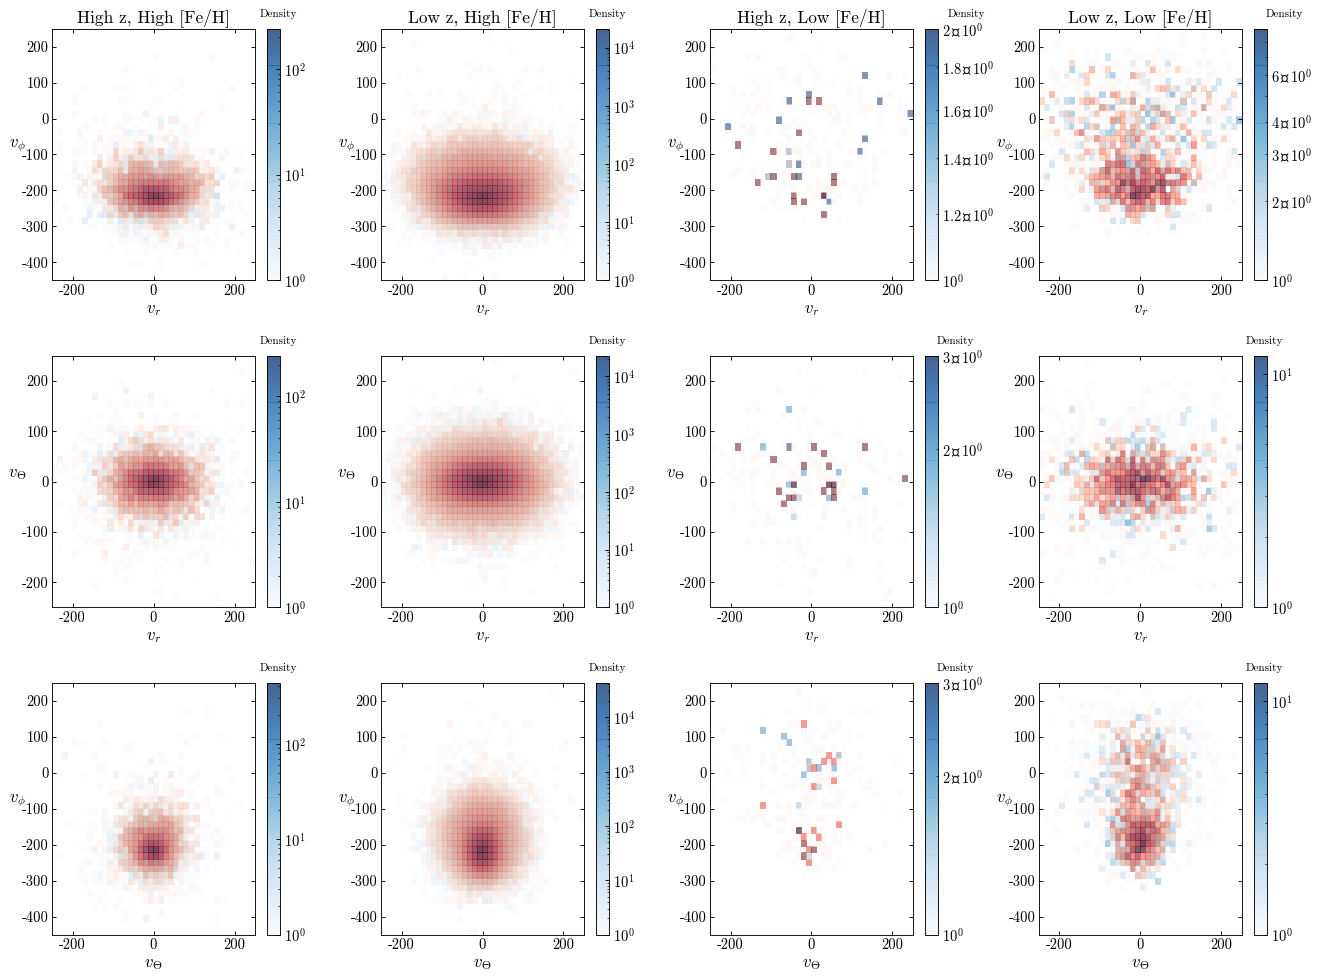

In [113]:
plot_2dhists_overlap(ellipse_df)

In [20]:
import seaborn as sns

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as so

def find_confidence_interval(x, pdf, confidence_level):
    #print("entering confidence")
    #print(pdf[pdf > x].sum() - confidence_level)
    return pdf[pdf > x].sum() - confidence_level

def density_contour(xdata, ydata, nbins_x, nbins_y, ax=None,pred = True, **contour_kwargs):
    """ Create a density contour plot.
    Parameters
    ----------
    xdata : numpy.ndarray
    ydata : numpy.ndarray
    nbins_x : int
        Number of bins along x dimension
    nbins_y : int
        Number of bins along y dimension
    ax : matplotlib.Axes (optional)
        If supplied, plot the contour to this axis. Otherwise, open a new figure
    contour_kwargs : dict
        kwargs to be passed to pyplot.contour()
    """

    H, xedges, yedges = np.histogram2d(xdata, ydata, bins=(nbins_x,nbins_y), density=True)
    x_bin_sizes = (xedges[1:] - xedges[:-1]).reshape((1,nbins_x))
    y_bin_sizes = (yedges[1:] - yedges[:-1]).reshape((nbins_y,1))

    pdf = (H*(x_bin_sizes*y_bin_sizes))
    # 0.39346934, 0.67534753, 0.86466472
    one_sigma = so.brentq(find_confidence_interval, 0., 1., args=(pdf, 0.39))
    two_sigma = so.brentq(find_confidence_interval, 0., 1., args=(pdf, 0.86))
    three_sigma = so.brentq(find_confidence_interval, 0., 1., args=(pdf, 0.99))
    levels = [three_sigma, two_sigma, one_sigma]
    #print(levels)
    X, Y = 0.5*(xedges[1:]+xedges[:-1]), 0.5*(yedges[1:]+yedges[:-1])
    Z = pdf.T

    if ax == None:
        contour = plt.contour(X, Y, Z, levels=levels, origin="lower", **contour_kwargs)
    else:
        if pred == True:
            contour = ax.contour(X, Y, Z, levels=levels, origin="lower", colors = ['maroon','red','salmon'],  **contour_kwargs)
        if pred == False:
            contour = ax.contour(X, Y, Z, levels=levels, origin="lower", colors = ['darkblue','blue','deepskyblue'],  **contour_kwargs)
    return contour, levels

from matplotlib import cm
from matplotlib.lines import Line2D
##Don't forget to run the fix in the block at the end!!
def plot_contours(ellipse_df):
    idx_lowmet_highz = np.where((ellipse_df.feh <= -1.5) & ((ellipse_df.z > 1.5) | (ellipse_df.z < -1.5)))
    ellipse_df_lowmet_highz = ellipse_df.loc[idx_lowmet_highz]
    print(ellipse_df_lowmet_highz.shape)
    
    idx_lowmet_lowz = np.where((ellipse_df.feh <= -1.5) & ((ellipse_df.z < 1.5) & (ellipse_df.z > -1.5)))
    ellipse_df_lowmet_lowz = ellipse_df.loc[idx_lowmet_lowz]
    print(ellipse_df_lowmet_lowz.shape)
    
    idx_highmet_highz = np.where((ellipse_df.feh > -1) & ((ellipse_df.z > 1.5) | (ellipse_df.z < -1.5)))
    ellipse_df_highmet_highz = ellipse_df.loc[idx_highmet_highz]
    print(ellipse_df_highmet_highz.shape)
    
    idx_highmet_lowz = np.where((ellipse_df.feh > -1) & ((ellipse_df.z < 1.5) & (ellipse_df.z > -1.5)))
    ellipse_df_highmet_lowz = ellipse_df.loc[idx_highmet_lowz]
    print(ellipse_df_highmet_lowz.shape)
    
    vrthbins = np.linspace(-100,100,30)
    vphibins = np.linspace(-300,-100,30)
    bin_area = (vrthbins[1]-vrthbins[0])*(vphibins[1]-vphibins[0])

    m1 = plt.Line2D([0],[0], color=cm.Reds(0.5),linewidth=2)
    m2 = plt.Line2D([1],[1], color=cm.Reds(1.),linewidth=10,alpha=.2)
    m3 = plt.Line2D([0],[0], color=cm.Greens(0.5),linewidth=2)
    m4 = plt.Line2D([1],[1], color=cm.Greens(1.),linewidth=10,alpha=.2)

    handles = [(m1,m2),(m3,m4)]
    labels = ['True','Predicted'] 

    fig, ax = plt.subplots(nrows=3, ncols=4, sharex=False, sharey=False,figsize=(20,15))
    plt.subplots_adjust(wspace = 0.3, hspace = 0.3)
    _,cs00a = sns.kdeplot(ellipse_df_highmet_highz['vr_pred'].values,ellipse_df_highmet_highz['vphi_pred'].values, cmap="Reds", shade=False,ax=ax[0,0])
    _,cs00b = sns.kdeplot(ellipse_df_highmet_highz['vr_true'].values,ellipse_df_highmet_highz['vphi_true'].values, cmap="Blues", shade=False,ax=ax[0,0])
    density_contour(ellipse_df_highmet_highz['vr_pred'].values,ellipse_df_highmet_highz['vphi_pred'].values, 30,30, ax=ax[0,0], extent=[vrthbins.min(),vrthbins.max(),vphibins.min(),vphibins.max()])
    #ax[0,0] = sns.kdeplot(ellipse_df_highmet_highz['vr_pred'].values,ellipse_df_highmet_highz['vphi_pred'].values, cmap="Reds", shade=True)
    #ctrue = ax[0,0].contour(counts_vr_vph_true_highmet_highz.T,extent=[vrthbins.min(),vrthbins.max(),vphibins.min(),vphibins.max()],linewidths=2.5,levels=np.linspace(0,0.03,15)/bin_area,cmap=cm.Reds)
    #cpred = ax[0,0].contour(counts_vr_vph_pred_highmet_highz.T,extent=[vrthbins.min(),vrthbins.max(),vphibins.min(),vphibins.max()],linewidths=2.5,levels=np.linspace(0,0.03,15)/bin_area,cmap=cm.Greens)
    ax[0,0].set_xlim(-75,75);
    ax[0,0].set_ylim(-300,-150);
    ax[0,0].clabel(cs00a, cs00a.levels, inline=True, fontsize=10)
    ax[0,0].clabel(cs00b, cs00b.levels, inline=True, fontsize=10)
    ax[0,0].set_xlabel(r'$v_{r}$')
    ax[0,0].set_ylabel('$v_{\phi}$', rotation = 360)

    #ctrue = ax[0,1].contour(counts_vr_vph_true_highmet_lowz.T,extent=[vrthbins.min(),vrthbins.max(),vphibins.min(),vphibins.max()],linewidths=2.5,levels=np.linspace(0,0.03,15)/bin_area,cmap=cm.Reds)
    #cpred = ax[0,1].contour(counts_vr_vph_pred_highmet_lowz.T,extent=[vrthbins.min(),vrthbins.max(),vphibins.min(),vphibins.max()],linewidths=2.5,levels=np.linspace(0,0.03,15)/bin_area,cmap=cm.Greens)
    _,cs01a = sns.kdeplot(ellipse_df_highmet_lowz['vr_pred'].values,ellipse_df_highmet_lowz['vphi_pred'].values, cmap="Reds", shade=False,ax=ax[0,1], extent=[vrthbins.min(),vrthbins.max(),vphibins.min(),vphibins.max()])
    _,cs01b = sns.kdeplot(ellipse_df_highmet_lowz['vr_true'].values,ellipse_df_highmet_lowz['vphi_true'].values, cmap="Blues", shade=False,ax=ax[0,1],extent=[vrthbins.min(),vrthbins.max(),vphibins.min(),vphibins.max()])
    ax[0,1].clabel(cs01a, cs01a.levels, inline=True, fontsize=10)
    ax[0,1].clabel(cs01b, cs01b.levels, inline=True, fontsize=10)
    ax[0,1].set_xlim(-75,75);
    ax[0,1].set_ylim(-300,-150);
    ax[0,1].set_xlabel(r'$v_{r}$')
    ax[0,1].set_ylabel('$v_{\phi}$', rotation = 360)
    
    #ctrue = ax[0,2].contour(counts_vr_vph_true_lowmet_highz.T,extent=[vrthbins.min(),vrthbins.max(),vphibins.min(),vphibins.max()],linewidths=2.5,levels=np.linspace(0,0.03,15)/bin_area,cmap=cm.Reds)
    #cpred = ax[0,2].contour(counts_vr_vph_pred_lowmet_highz.T,extent=[vrthbins.min(),vrthbins.max(),vphibins.min(),vphibins.max()],linewidths=2.5,levels=np.linspace(0,0.03,15)/bin_area,cmap=cm.Greens)
    _,cs02a = sns.kdeplot(ellipse_df_lowmet_highz['vr_pred'].values,ellipse_df_lowmet_highz['vphi_pred'].values, cmap="Reds", shade=False,ax=ax[0,2])
    _,cs02b = sns.kdeplot(ellipse_df_lowmet_highz['vr_true'].values,ellipse_df_lowmet_highz['vphi_true'].values, cmap="Blues", shade=False,ax=ax[0,2])
    ax[0,2].clabel(cs02a, cs02a.levels, inline=True, fontsize=10)
    ax[0,2].clabel(cs02b, cs02b.levels, inline=True, fontsize=10)
    #ax[0,2].set_xlim(-75,75);
    #ax[0,2].set_ylim(-260,-175)
    ax[0,2].set_xlabel(r'$v_{r}$')
    ax[0,2].set_ylabel('$v_{\phi}$', rotation = 360)
    
    #ctrue = ax[0,3].contour(counts_vr_vph_true_lowmet_lowz.T,extent=[vrthbins.min(),vrthbins.max(),vphibins.min(),vphibins.max()],linewidths=2.5,levels=np.linspace(0,0.03,15)/bin_area,cmap=cm.Reds)
    #cpred = ax[0,3].contour(counts_vr_vph_pred_lowmet_lowz.T,extent=[vrthbins.min(),vrthbins.max(),vphibins.min(),vphibins.max()],linewidths=2.5,levels=np.linspace(0,0.03,15)/bin_area,cmap=cm.Greens)
    _,cs03a = sns.kdeplot(ellipse_df_lowmet_lowz['vr_pred'].values,ellipse_df_lowmet_lowz['vphi_pred'].values, cmap="Reds", shade=False,ax=ax[0,3])
    _,cs03b = sns.kdeplot(ellipse_df_lowmet_lowz['vr_true'].values,ellipse_df_lowmet_lowz['vphi_true'].values, cmap="Blues", shade=False,ax=ax[0,3])
    #ax[0,3].set_xlim(-75,75);
    #ax[0,3].set_ylim(-260,-175)
    ax[0,3].clabel(cs03a, cs03a.levels, inline=True, fontsize=10)
    ax[0,3].clabel(cs03b, cs03b.levels, inline=True, fontsize=10)
    ax[0,3].set_xlabel(r'$v_{r}$')
    ax[0,3].set_ylabel('$v_{\phi}$', rotation = 360)
    
    #h5 = ax[1,0].hist2d(ellipse_df_highmet_highz['vr_pred'].values,ellipse_df_highmet_highz['vth_pred'].values, bins=40, norm = LogNorm())
    #clb5 = plt.colorbar(h5[3],ax = ax[1,0])
    #clb5.set_label('Density', labelpad=-25, y=1.08, rotation=0,fontsize=10)
    _,cs10a = sns.kdeplot(ellipse_df_highmet_highz['vr_pred'].values,ellipse_df_highmet_highz['vth_pred'].values, cmap="Reds", shade=False,ax=ax[1,0])
    _,cs10b = sns.kdeplot(ellipse_df_highmet_highz['vr_true'].values,ellipse_df_highmet_highz['vth_true'].values, cmap="Blues", shade=False,ax=ax[1,0])
    ax[1,0].clabel(cs10a, cs10a.levels, inline=True, fontsize=10)
    ax[1,0].clabel(cs10b, cs10b.levels, inline=True, fontsize=10)
    ax[1,0].set_xlabel(r'$v_{r}$')
    ax[1,0].set_ylabel('$v_{\Theta}$', rotation = 360)
    ax[1,0].set_xlim(-75,75);
    ax[1,0].set_ylim(-75,75)
    
    #h6 = ax[1,1].hist2d(ellipse_df_highmet_lowz['vr_pred'].values,ellipse_df_highmet_lowz['vth_pred'].values, bins=40, norm = LogNorm())
    #clb6 = plt.colorbar(h6[3],ax = ax[1,1])
    #clb6.set_label('Density', labelpad=-25, y=1.08, rotation=0,fontsize=10)
    _,cs11a = sns.kdeplot(ellipse_df_highmet_lowz['vr_pred'].values,ellipse_df_highmet_lowz['vth_pred'].values, cmap="Reds", shade=False,ax=ax[1,1])
    _,cs11b = sns.kdeplot(ellipse_df_highmet_lowz['vr_true'].values,ellipse_df_highmet_lowz['vth_true'].values, cmap="Blues", shade=False,ax=ax[1,1])
    ax[1,1].clabel(cs11a, cs11a.levels, inline=True, fontsize=10)
    ax[1,1].clabel(cs11b, cs11b.levels, inline=True, fontsize=10)
    ax[1,1].set_xlim(-75,75)
    ax[1,1].set_ylim(-75,75)
    ax[1,1].set_xlabel(r'$v_{r}$')
    ax[1,1].set_ylabel('$v_{\Theta}$', rotation = 360)
    
    #h7 = ax[1,2].hist2d(ellipse_df_lowmet_highz['vr_pred'].values,ellipse_df_lowmet_highz['vth_pred'].values, bins=40, norm = LogNorm())
    #clb7 = plt.colorbar(h7[3],ax = ax[1,2])
    #clb7.set_label('Density', labelpad=-25, y=1.08, rotation=0,fontsize=10)
    _,cs12a = sns.kdeplot(ellipse_df_lowmet_highz['vr_pred'].values,ellipse_df_lowmet_highz['vth_pred'].values, cmap="Reds", shade=False,ax=ax[1,2])
    _,cs12b = sns.kdeplot(ellipse_df_lowmet_highz['vr_true'].values,ellipse_df_lowmet_highz['vth_true'].values, cmap="Blues", shade=False,ax=ax[1,2])
    ax[1,2].clabel(cs12a, cs12a.levels, inline=True, fontsize=10)
    ax[1,2].clabel(cs12b, cs12b.levels, inline=True, fontsize=10)
    ax[1,2].set_xlabel(r'$v_{r}$')
    ax[1,2].set_ylabel('$v_{\Theta}$', rotation = 360)
    
    #h8 = ax[1,3].hist2d(ellipse_df_lowmet_lowz['vr_pred'].values,ellipse_df_lowmet_lowz['vth_pred'].values, bins=40, norm = LogNorm())
    #clb8 = plt.colorbar(h8[3],ax = ax[1,3])
    #clb8.set_label('Density', labelpad=-25, y=1.08, rotation=0,fontsize=10)
    _,cs13a = sns.kdeplot(ellipse_df_lowmet_lowz['vr_pred'].values,ellipse_df_lowmet_lowz['vth_pred'].values, cmap="Reds", shade=False,ax=ax[1,3])
    _,cs13b = sns.kdeplot(ellipse_df_lowmet_lowz['vr_true'].values,ellipse_df_lowmet_lowz['vth_true'].values, cmap="Blues", shade=False,ax=ax[1,3])
    ax[1,3].clabel(cs13a, cs13a.levels, inline=True, fontsize=10)
    ax[1,3].clabel(cs13b, cs13b.levels, inline=True, fontsize=10)
    ax[1,3].set_xlabel(r'$v_{r}$')
    ax[1,3].set_ylabel('$v_{\Theta}$', rotation = 360)
    #fig.colorbar(h1[3],orientation='vertical',ax=ax[:], shrink=0.5, label = "Density")
    
    #h9 = ax[2,0].hist2d(ellipse_df_highmet_highz['vth_pred'].values,ellipse_df_highmet_highz['vphi_pred'].values, bins=40, norm = LogNorm())
    #clb9 = plt.colorbar(h9[3],ax = ax[2,0])
    #clb9.set_label('Density', labelpad=-25, y=1.08, rotation=0,fontsize=10)
    _,cs20a =sns.kdeplot(ellipse_df_highmet_highz['vth_pred'].values,ellipse_df_highmet_highz['vphi_pred'].values, cmap="Reds", shade=False,ax=ax[2,0])
    _,cs20b = sns.kdeplot(ellipse_df_highmet_highz['vth_true'].values,ellipse_df_highmet_highz['vphi_true'].values, cmap="Blues", shade=False,ax=ax[2,0])
    ax[2,0].clabel(cs20a, cs20a.levels, inline=True, fontsize=10)
    ax[2,0].clabel(cs20b, cs20b.levels, inline=True, fontsize=10)
    ax[2,0].set_ylabel(r'$v_{\phi}$', rotation = 360)
    ax[2,0].set_xlabel('$v_{\Theta}$', rotation = 360)
    ax[2,0].set_xlim(-75,75);
    ax[2,0].set_ylim(-300,-150)
    
    #h10 = ax[2,1].hist2d(ellipse_df_highmet_lowz['vth_pred'].values,ellipse_df_highmet_lowz['vphi_pred'].values, bins=40, norm = LogNorm())
    #clb10 = plt.colorbar(h10[3],ax = ax[2,1])
    #clb10.set_label('Density', labelpad=-25, y=1.08, rotation=0,fontsize=10)
    _,cs21a = sns.kdeplot(ellipse_df_highmet_lowz['vth_pred'].values,ellipse_df_highmet_lowz['vphi_pred'].values, cmap="Reds", shade=False,ax=ax[2,1])
    _,cs21b = sns.kdeplot(ellipse_df_highmet_lowz['vth_true'].values,ellipse_df_highmet_lowz['vphi_true'].values, cmap="Blues", shade=False,ax=ax[2,1])
    ax[2,1].clabel(cs21a, cs21a.levels, inline=True, fontsize=10)
    ax[2,1].clabel(cs21b, cs21b.levels, inline=True, fontsize=10)
    ax[2,1].set_xlim(-75,75);
    ax[2,1].set_ylim(-300,-150)
    ax[2,1].set_ylabel(r'$v_{\phi}$', rotation = 360)
    ax[2,1].set_xlabel('$v_{\Theta}$', rotation = 360)
    
    #h11a = ax[2,2].hist2d(ellipse_df_lowmet_highz['vth_pred'].values,ellipse_df_lowmet_highz['vphi_pred'].values, bins=40, cmap="Reds", alpha = 0.5)
    #h11b = ax[2,2].hist2d(ellipse_df_lowmet_highz['vth_true'].values,ellipse_df_lowmet_highz['vphi_true'].values, bins=40, cmap="Blues", alpha = 0.5)
    #clb11a = plt.colorbar(h11a[3],ax = ax[2,2])
    #clb11b = plt.colorbar(h11b[3],ax = ax[2,2])
    #clb11a.set_label('Density', labelpad=-25, y=1.08, rotation=0,fontsize=10)
    _,cs22a = sns.kdeplot(ellipse_df_lowmet_highz['vth_pred'].values,ellipse_df_lowmet_highz['vphi_pred'].values, cmap="Reds", shade=False,ax=ax[2,2])
    _,cs22b =sns.kdeplot(ellipse_df_lowmet_highz['vth_true'].values,ellipse_df_lowmet_highz['vphi_true'].values, cmap="Blues", shade=False,ax=ax[2,2])
    ax[2,2].clabel(cs22a, cs22a.levels, inline=True, fontsize=10)
    ax[2,2].clabel(cs22b, cs22b.levels, inline=True, fontsize=10)
    ax[2,2].set_ylabel(r'$v_{\phi}$', rotation = 360)
    ax[2,2].set_xlabel('$v_{\Theta}$', rotation = 360)
    
    #h12 = ax[2,3].hist2d(ellipse_df_lowmet_lowz['vth_pred'].values,ellipse_df_lowmet_lowz['vphi_pred'].values, bins=40, norm = LogNorm())
    #clb12 = plt.colorbar(h12[3],ax = ax[2,3])
    #clb12.set_label('Density', labelpad=-25, y=1.08, rotation=0,fontsize=10)
    _,cs23a = sns.kdeplot(ellipse_df_lowmet_lowz['vth_pred'].values,ellipse_df_lowmet_lowz['vphi_pred'].values, cmap="Reds", shade=False,ax=ax[2,3])
    _,cs23b = sns.kdeplot(ellipse_df_lowmet_lowz['vth_true'].values,ellipse_df_lowmet_lowz['vphi_true'].values, cmap="Blues", shade=False,ax=ax[2,3])
    ax[2,3].set_ylabel(r'$v_{\phi}$', rotation = 360)
    ax[2,3].set_xlabel('$v_{\Theta}$', rotation = 360)
    ax[2,3].clabel(cs23a, cs23a.levels, inline=True, fontsize=10)
    ax[2,3].clabel(cs23b, cs23b.levels, inline=True, fontsize=10)
    #fig.colorbar(h1[3],orientation='vertical',ax=ax[:], shrink=0.5, label = "Density")
    ax[0,0].set_title("High z ($|z| > 1.5$), High [Fe/H] ($> -1$),\n "+ str(ellipse_df_highmet_highz.shape[0])+" stars")
    ax[0,1].set_title("Low z ($|z| < 1.5$), High [Fe/H] ($> -1$),\n "+ str(ellipse_df_highmet_lowz.shape[0])+" stars")
    ax[0,2].set_title("High z($|z| > 1.5$), Low [Fe/H] ($< -1.5$),\n "+ str(ellipse_df_lowmet_highz.shape[0])+" stars")
    ax[0,3].set_title("Low z ($|z| < 1.5$), Low [Fe/H] ($< -1.5$),\n "+ str(ellipse_df_lowmet_lowz.shape[0])+" stars")
    import matplotlib.patches as mpatches
    red_patch = mpatches.Patch(color='red', label='Predicted')
    blue_patch = mpatches.Patch(color='blue', label='Truth')
    plt.legend(handles=[red_patch,blue_patch], ncol = 1)
    #fig.savefig('G_train_2it_500000_tanh_D30_nodropout_seed1test1_lbppp_log2d_newtm/contours_z1p5.png')
        

In [67]:
from matplotlib import cm
from matplotlib.lines import Line2D
from matplotlib.colors import LogNorm
##Don't forget to run the fix in the block at the end!!
def plot_contours_TEST(ellipse_df):
    z_idx = 2.52
    idx_lowmet_highz = np.where((ellipse_df.feh <= -1.5) & ((ellipse_df.z > z_idx) | (ellipse_df.z < -z_idx)))
    ellipse_df_lowmet_highz = ellipse_df.loc[idx_lowmet_highz]
    print(ellipse_df_lowmet_highz.shape)
    
    idx_lowmet_lowz = np.where((ellipse_df.feh <= -1.5) & ((ellipse_df.z < z_idx) & (ellipse_df.z > -z_idx)))
    ellipse_df_lowmet_lowz = ellipse_df.loc[idx_lowmet_lowz]
    print(ellipse_df_lowmet_lowz.shape)
    
    idx_highmet_highz = np.where((ellipse_df.feh > -1) & ((ellipse_df.z > z_idx) | (ellipse_df.z < -z_idx)))
    ellipse_df_highmet_highz = ellipse_df.loc[idx_highmet_highz]
    print(ellipse_df_highmet_highz.shape)
    
    idx_highmet_lowz = np.where((ellipse_df.feh > -1) & ((ellipse_df.z < z_idx) & (ellipse_df.z > -z_idx)))
    ellipse_df_highmet_lowz = ellipse_df.loc[idx_highmet_lowz]
    print(ellipse_df_highmet_lowz.shape)
    
    vrthbins = np.linspace(-250,250,30)
    vphibins = np.linspace(-450,250,30)
    bin_area = (vrthbins[1]-vrthbins[0])*(vphibins[1]-vphibins[0])

    m1 = plt.Line2D([0],[0], color=cm.Reds(0.5),linewidth=2)
    m2 = plt.Line2D([1],[1], color=cm.Reds(1.),linewidth=10,alpha=.2)
    m3 = plt.Line2D([0],[0], color=cm.Greens(0.5),linewidth=2)
    m4 = plt.Line2D([1],[1], color=cm.Greens(1.),linewidth=10,alpha=.2)

    handles = [(m1,m2),(m3,m4)]
    labels = ['True','Predicted'] 

    fig, ax = plt.subplots(nrows=3, ncols=4, sharex=False, sharey=False,figsize=(20,15))
    plt.subplots_adjust(wspace = 0.3, hspace = 0.3)
    h1 = ax[0,0].hist2d(ellipse_df_highmet_highz['vr_true'].values,ellipse_df_highmet_highz['vphi_true'].values, bins=30,range=[[vrthbins.min(),vrthbins.max()],[vphibins.min(),vphibins.max()]], norm = LogNorm(), alpha = 0.5, density = True)
    contoura, dca = density_contour(ellipse_df_highmet_highz['vr_pred'].values,ellipse_df_highmet_highz['vphi_pred'].values, 30,30, ax=ax[0,0], extent=[vrthbins.min(),vrthbins.max(),vphibins.min(),vphibins.max()], pred = True)
    contourb, dcb = density_contour(ellipse_df_highmet_highz['vr_true'].values,ellipse_df_highmet_highz['vphi_true'].values, 30,30, ax=ax[0,0], extent=[vrthbins.min(),vrthbins.max(),vphibins.min(),vphibins.max()], pred = False)
    #ax[0,0].set_xlim(-75,75);
    #ax[0,0].set_ylim(-300,-150);
    ax[0,0].set_xlabel(r'$v_{r}$')
    ax[0,0].set_ylabel('$v_{\phi}$', rotation = 360)
    

    h2 = ax[0,1].hist2d(ellipse_df_highmet_lowz['vr_true'].values,ellipse_df_highmet_lowz['vphi_true'].values, bins=30, range=[[vrthbins.min(),vrthbins.max()],[vphibins.min(),vphibins.max()]],norm = LogNorm(), alpha = 0.5, density = True)
    contoura, dca = density_contour(ellipse_df_highmet_lowz['vr_pred'].values,ellipse_df_highmet_lowz['vphi_pred'].values, 30,30, ax=ax[0,1], extent=[vrthbins.min(),vrthbins.max(),vphibins.min(),vphibins.max()], pred = True)
    contourb, dcb = density_contour(ellipse_df_highmet_lowz['vr_true'].values,ellipse_df_highmet_lowz['vphi_true'].values, 30,30, ax=ax[0,1], extent=[vrthbins.min(),vrthbins.max(),vphibins.min(),vphibins.max()], pred = False)
    #ax[0,1].set_xlim(-75,75);
    #ax[0,1].set_ylim(-300,-150);
    ax[0,1].set_xlabel(r'$v_{r}$')
    ax[0,1].set_ylabel('$v_{\phi}$', rotation = 360)
    
   
    h3 = ax[0,2].hist2d(ellipse_df_lowmet_highz['vr_true'].values,ellipse_df_lowmet_highz['vphi_true'].values, bins=30, range=[[vrthbins.min(),vrthbins.max()],[vphibins.min(),vphibins.max()]],norm = LogNorm(), alpha = 0.5, density = True)
    contoura, dca = density_contour(ellipse_df_lowmet_highz['vr_pred'].values,ellipse_df_lowmet_highz['vphi_pred'].values, 30,30, ax=ax[0,2], extent=[vrthbins.min(),vrthbins.max(),vphibins.min(),vphibins.max()], pred = True)
    contourb, dcb = density_contour(ellipse_df_lowmet_highz['vr_true'].values,ellipse_df_lowmet_highz['vphi_true'].values, 30,30, ax=ax[0,2], extent=[vrthbins.min(),vrthbins.max(),vphibins.min(),vphibins.max()], pred = False)
    #ax[0,2].set_xlim(-75,75);
    #ax[0,2].set_ylim(-260,-175)
    ax[0,2].set_xlabel(r'$v_{r}$')
    ax[0,2].set_ylabel('$v_{\phi}$', rotation = 360)
    
    h4 = ax[0,3].hist2d(ellipse_df_lowmet_lowz['vr_true'].values,ellipse_df_lowmet_lowz['vphi_true'].values, bins=30, range=[[vrthbins.min(),vrthbins.max()],[vphibins.min(),vphibins.max()]],norm = LogNorm(), alpha = 0.5, density = True)
    contoura, dca = density_contour(ellipse_df_lowmet_lowz['vr_pred'].values,ellipse_df_lowmet_lowz['vphi_pred'].values, 30,30, ax=ax[0,3], extent=[vrthbins.min(),vrthbins.max(),vphibins.min(),vphibins.max()], pred = True)
    contourb, dcb = density_contour(ellipse_df_lowmet_lowz['vr_true'].values,ellipse_df_lowmet_lowz['vphi_true'].values, 30,30, ax=ax[0,3], extent=[vrthbins.min(),vrthbins.max(),vphibins.min(),vphibins.max()], pred = False)
    #ax[0,3].set_xlim(-75,75);
    #ax[0,3].set_ylim(-260,-175)
    ax[0,3].set_xlabel(r'$v_{r}$')
    ax[0,3].set_ylabel('$v_{\phi}$', rotation = 360)
    

    h5 = ax[1,0].hist2d(ellipse_df_highmet_highz['vr_true'].values,ellipse_df_highmet_highz['vth_true'].values, bins=30,range=[[vrthbins.min(),vrthbins.max()],[vrthbins.min(),vrthbins.max()]], norm = LogNorm(), alpha = 0.5, density = True)
    contoura, dca = density_contour(ellipse_df_highmet_highz['vr_pred'].values,ellipse_df_highmet_highz['vth_pred'].values, 30,30, ax=ax[1,0], extent=[vrthbins.min(),vrthbins.max(),vrthbins.min(),vrthbins.max()], pred = True)
    contourb, dcb = density_contour(ellipse_df_highmet_highz['vr_true'].values,ellipse_df_highmet_highz['vth_true'].values, 30,30, ax=ax[1,0], extent=[vrthbins.min(),vrthbins.max(),vrthbins.min(),vrthbins.max()], pred = False)
    ax[1,0].set_xlabel(r'$v_{r}$')
    ax[1,0].set_ylabel('$v_{\Theta}$', rotation = 360)
   # ax[1,0].set_xlim(-75,75);
   # ax[1,0].set_ylim(-75,75)
    

    h6 = ax[1,1].hist2d(ellipse_df_highmet_lowz['vr_true'].values,ellipse_df_highmet_lowz['vth_true'].values, bins=30,range=[[vrthbins.min(),vrthbins.max()],[vrthbins.min(),vrthbins.max()]], norm = LogNorm(), alpha = 0.5, density = True)
    contoura, dca = density_contour(ellipse_df_highmet_lowz['vr_pred'].values,ellipse_df_highmet_lowz['vth_pred'].values, 30,30, ax=ax[1,1], extent=[vrthbins.min(),vrthbins.max(),vrthbins.min(),vrthbins.max()], pred = True)
    contourb, dcb = density_contour(ellipse_df_highmet_lowz['vr_true'].values,ellipse_df_highmet_lowz['vth_true'].values, 30,30, ax=ax[1,1], extent=[vrthbins.min(),vrthbins.max(),vrthbins.min(),vrthbins.max()], pred = False)
    ax[1,1].set_xlabel(r'$v_{r}$')
    ax[1,1].set_ylabel('$v_{\Theta}$', rotation = 360)
    

    h7 = ax[1,2].hist2d(ellipse_df_lowmet_highz['vr_true'].values,ellipse_df_lowmet_highz['vth_true'].values, bins=30,range=[[vrthbins.min(),vrthbins.max()],[vrthbins.min(),vrthbins.max()]], norm = LogNorm(), alpha = 0.5, density = True)
    contoura, dca = density_contour(ellipse_df_lowmet_highz['vr_pred'].values,ellipse_df_lowmet_highz['vth_pred'].values, 30,30, ax=ax[1,2], extent=[vrthbins.min(),vrthbins.max(),vrthbins.min(),vrthbins.max()], pred = True)
    contourb, dcb = density_contour(ellipse_df_lowmet_highz['vr_true'].values,ellipse_df_lowmet_highz['vth_true'].values, 30,30, ax=ax[1,2], extent=[vrthbins.min(),vrthbins.max(),vrthbins.min(),vrthbins.max()], pred = False)
    ax[1,2].set_xlabel(r'$v_{r}$')
    ax[1,2].set_ylabel('$v_{\Theta}$', rotation = 360)
    

    h8 = ax[1,3].hist2d(ellipse_df_lowmet_lowz['vr_true'].values,ellipse_df_lowmet_lowz['vth_true'].values, bins=30,range=[[vrthbins.min(),vrthbins.max()],[vrthbins.min(),vrthbins.max()]], norm = LogNorm(), alpha = 0.5, density = True)
    contoura, dca = density_contour(ellipse_df_lowmet_lowz['vr_pred'].values,ellipse_df_lowmet_lowz['vth_pred'].values, 30,30, ax=ax[1,3], extent=[vrthbins.min(),vrthbins.max(),vrthbins.min(),vrthbins.max()], pred = True)
    contourb, dcb = density_contour(ellipse_df_lowmet_lowz['vr_true'].values,ellipse_df_lowmet_lowz['vth_true'].values, 30,30, ax=ax[1,3], extent=[vrthbins.min(),vrthbins.max(),vrthbins.min(),vrthbins.max()], pred = False)
    ax[1,3].set_xlabel(r'$v_{r}$')
    ax[1,3].set_ylabel('$v_{\Theta}$', rotation = 360)
    
    h9 = ax[2,0].hist2d(ellipse_df_highmet_highz['vth_true'].values,ellipse_df_highmet_highz['vphi_true'].values, bins=30,range=[[vrthbins.min(),vrthbins.max()],[vphibins.min(),vphibins.max()]], norm = LogNorm(), alpha = 0.5, density = True)
    contoura, dca = density_contour(ellipse_df_highmet_highz['vth_pred'].values,ellipse_df_highmet_highz['vphi_pred'].values, 30,30, ax=ax[2,0], extent=[vrthbins.min(),vrthbins.max(),vphibins.min(),vphibins.max()], pred = True)
    contourb, dcb = density_contour(ellipse_df_highmet_highz['vth_true'].values,ellipse_df_highmet_highz['vphi_true'].values, 30,30, ax=ax[2,0], extent=[vrthbins.min(),vrthbins.max(),vphibins.min(),vphibins.max()], pred = False)
    ax[2,0].set_ylabel(r'$v_{\phi}$', rotation = 360)
    ax[2,0].set_xlabel('$v_{\Theta}$', rotation = 360)

    
    h10 = ax[2,1].hist2d(ellipse_df_highmet_lowz['vth_true'].values,ellipse_df_highmet_lowz['vphi_true'].values, bins=30,range=[[vrthbins.min(),vrthbins.max()],[vphibins.min(),vphibins.max()]], norm = LogNorm(), alpha = 0.5, density = True)
    contoura, dca = density_contour(ellipse_df_highmet_lowz['vth_pred'].values,ellipse_df_highmet_lowz['vphi_pred'].values, 30,30, ax=ax[2,1], extent=[vrthbins.min(),vrthbins.max(),vphibins.min(),vphibins.max()], pred = True)
    contourb, dcb = density_contour(ellipse_df_highmet_lowz['vth_true'].values,ellipse_df_highmet_lowz['vphi_true'].values, 30,30, ax=ax[2,1], extent=[vrthbins.min(),vrthbins.max(),vphibins.min(),vphibins.max()], pred = False)
    ax[2,1].set_ylabel(r'$v_{\phi}$', rotation = 360)
    ax[2,1].set_xlabel('$v_{\Theta}$', rotation = 360)
    
    h11 = ax[2,2].hist2d(ellipse_df_lowmet_highz['vth_true'].values,ellipse_df_lowmet_highz['vphi_true'].values, bins=30,range=[[vrthbins.min(),vrthbins.max()],[vphibins.min(),vphibins.max()]], norm = LogNorm(), alpha = 0.5, density = True)
    contoura, dca = density_contour(ellipse_df_lowmet_highz['vth_pred'].values,ellipse_df_lowmet_highz['vphi_pred'].values, 30,30, ax=ax[2,2], extent=[vrthbins.min(),vrthbins.max(),vphibins.min(),vphibins.max()], pred = True)
    contourb, dcb = density_contour(ellipse_df_lowmet_highz['vth_true'].values,ellipse_df_lowmet_highz['vphi_true'].values, 30,30, ax=ax[2,2], extent=[vrthbins.min(),vrthbins.max(),vphibins.min(),vphibins.max()], pred = False)
    ax[2,2].set_ylabel(r'$v_{\phi}$', rotation = 360)
    ax[2,2].set_xlabel('$v_{\Theta}$', rotation = 360)
    
    h12 = ax[2,3].hist2d(ellipse_df_lowmet_lowz['vth_true'].values,ellipse_df_lowmet_lowz['vphi_true'].values, bins=30,range=[[vrthbins.min(),vrthbins.max()],[vphibins.min(),vphibins.max()]], norm = LogNorm(), alpha = 0.5, density = True)
    contoura, dca = density_contour(ellipse_df_lowmet_lowz['vth_pred'].values,ellipse_df_lowmet_lowz['vphi_pred'].values, 30,30, ax=ax[2,3], extent=[vrthbins.min(),vrthbins.max(),vphibins.min(),vphibins.max()], pred = True)
    contourb, dcb = density_contour(ellipse_df_lowmet_lowz['vth_true'].values,ellipse_df_lowmet_lowz['vphi_true'].values, 30,30, ax=ax[2,3], extent=[vrthbins.min(),vrthbins.max(),vphibins.min(),vphibins.max()], pred = False)
    ax[2,3].set_ylabel(r'$v_{\phi}$', rotation = 360)
    ax[2,3].set_xlabel('$v_{\Theta}$', rotation = 360)
    
    ax[0,0].set_title("High z ($|z| > $"+str(z_idx)+"), $|z| > 2$,\n High [Fe/H] ($> -1$), "+ str(ellipse_df_highmet_highz.shape[0])+" stars")
    ax[0,1].set_title("Low z ($|z| < $"+str(z_idx)+"), $|z| > 2$,\n High [Fe/H] ($> -1$), "+ str(ellipse_df_highmet_lowz.shape[0])+" stars")
    ax[0,2].set_title("High z($|z| > $"+str(z_idx)+"), $|z| > 2$,\n Low [Fe/H] ($< -1.5$), "+ str(ellipse_df_lowmet_highz.shape[0])+" stars")
    ax[0,3].set_title("Low z ($|z| < $"+str(z_idx)+"), $|z| > 2$,\n Low [Fe/H] ($< -1.5$), "+ str(ellipse_df_lowmet_lowz.shape[0])+" stars")
    import matplotlib.patches as mpatches
    red_patch = mpatches.Patch(color='red', label='Predicted')
    blue_patch = mpatches.Patch(color='blue', label='Truth')
    plt.legend(handles=[red_patch,blue_patch], ncol = 1)
    fig.savefig('G_train_2it_500000_tanh_D30_nodropout_seed1test1_lbppp_log2d_highz/contours_noerror.png')

(3474, 21)
(1202, 21)
(225190, 21)
(239909, 21)


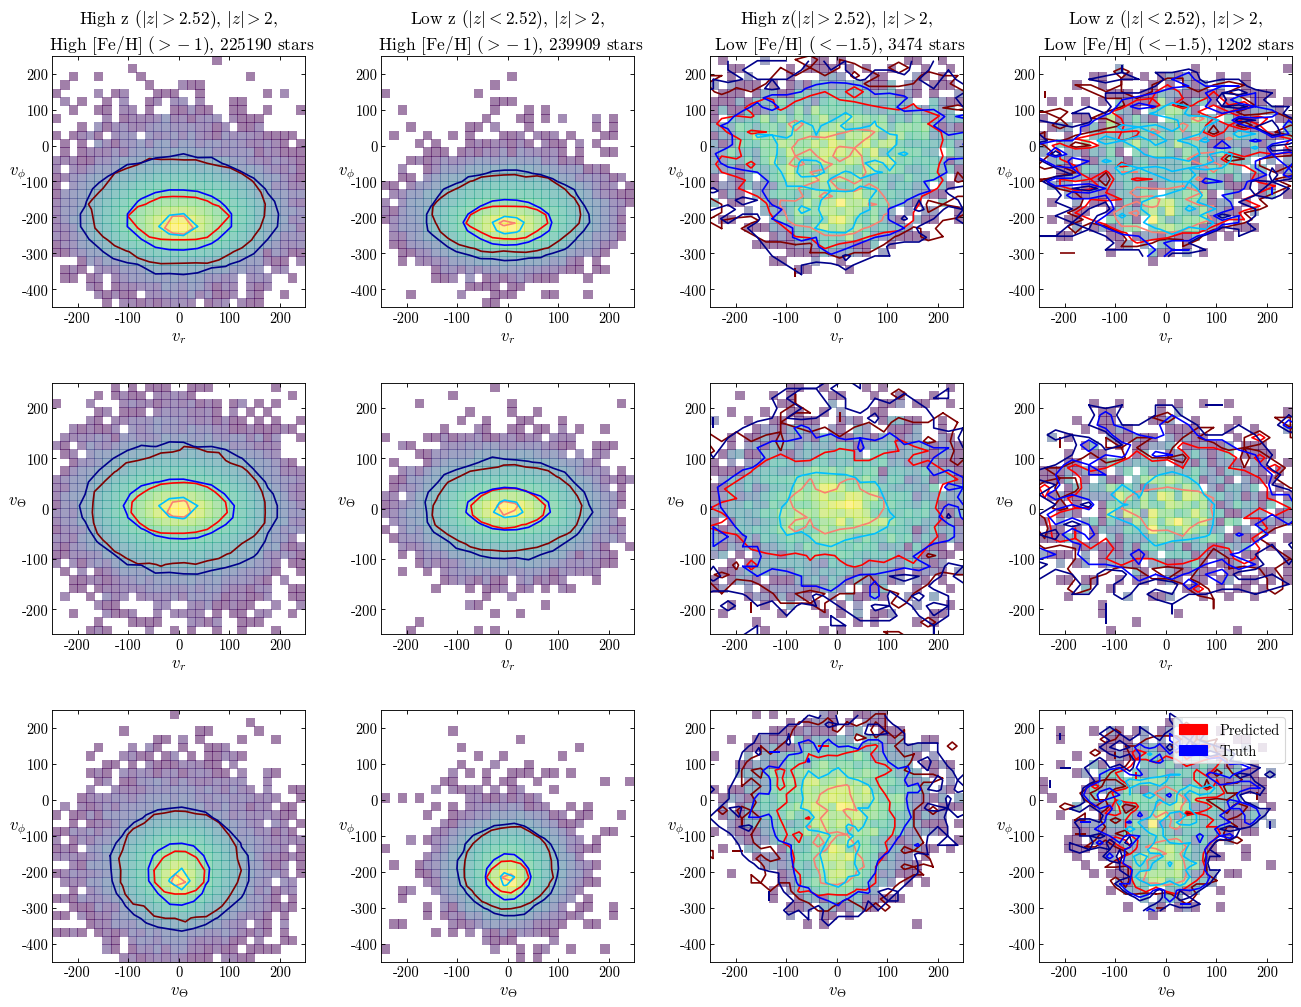

In [68]:
import warnings
warnings.filterwarnings("ignore")
plot_contours_TEST(ellipse_df)

In [69]:
from matplotlib import cm
from matplotlib.lines import Line2D
from matplotlib.colors import LogNorm
##Don't forget to run the fix in the block at the end!!
def plot_contours_no_z_selection(ellipse_df):
    idx_lowmet = np.where((ellipse_df.feh <= -1.5))
    ellipse_df_lowmet = ellipse_df.loc[idx_lowmet]
    print(ellipse_df_lowmet.shape)

    idx_highmet = np.where((ellipse_df.feh > -1))
    ellipse_df_highmet = ellipse_df.loc[idx_highmet]
    print(ellipse_df_highmet.shape)

    vrthbins = np.linspace(-250,250,30)
    vphibins = np.linspace(-450,250,30)
    bin_area = (vrthbins[1]-vrthbins[0])*(vphibins[1]-vphibins[0])

    m1 = plt.Line2D([0],[0], color=cm.Reds(0.5),linewidth=2)
    m2 = plt.Line2D([1],[1], color=cm.Reds(1.),linewidth=10,alpha=.2)
    m3 = plt.Line2D([0],[0], color=cm.Greens(0.5),linewidth=2)
    m4 = plt.Line2D([1],[1], color=cm.Greens(1.),linewidth=10,alpha=.2)

    handles = [(m1,m2),(m3,m4)]
    labels = ['True','Predicted'] 

    fig, ax = plt.subplots(nrows=3, ncols=2, sharex=False, sharey=False,figsize=(10,15))
    plt.subplots_adjust(wspace = 0.3, hspace = 0.3)
    h1 = ax[0,0].hist2d(ellipse_df_highmet['vr_true'].values,ellipse_df_highmet['vphi_true'].values, bins=30,range=[[vrthbins.min(),vrthbins.max()],[vphibins.min(),vphibins.max()]], norm = LogNorm(), alpha = 0.5, density = True)
    contoura, dca = density_contour(ellipse_df_highmet['vr_pred'].values,ellipse_df_highmet['vphi_pred'].values, 30,30, ax=ax[0,0], extent=[vrthbins.min(),vrthbins.max(),vphibins.min(),vphibins.max()], pred = True)
    contourb, dcb = density_contour(ellipse_df_highmet['vr_true'].values,ellipse_df_highmet['vphi_true'].values, 30,30, ax=ax[0,0], extent=[vrthbins.min(),vrthbins.max(),vphibins.min(),vphibins.max()], pred = False)
    #ax[0,0].set_xlim(-75,75);
    #ax[0,0].set_ylim(-300,-150);
    ax[0,0].set_xlabel(r'$v_{r}$')
    ax[0,0].set_ylabel('$v_{\phi}$', rotation = 360)
    
   
    h3 = ax[0,1].hist2d(ellipse_df_lowmet['vr_true'].values,ellipse_df_lowmet['vphi_true'].values, bins=30, range=[[vrthbins.min(),vrthbins.max()],[vphibins.min(),vphibins.max()]],norm = LogNorm(), alpha = 0.5, density = True)
    contoura, dca = density_contour(ellipse_df_lowmet['vr_pred'].values,ellipse_df_lowmet['vphi_pred'].values, 30,30, ax=ax[0,1], extent=[vrthbins.min(),vrthbins.max(),vphibins.min(),vphibins.max()], pred = True)
    contourb, dcb = density_contour(ellipse_df_lowmet['vr_true'].values,ellipse_df_lowmet['vphi_true'].values, 30,30, ax=ax[0,1], extent=[vrthbins.min(),vrthbins.max(),vphibins.min(),vphibins.max()], pred = False)
    #ax[0,2].set_xlim(-75,75);
    #ax[0,2].set_ylim(-260,-175)
    ax[0,1].set_xlabel(r'$v_{r}$')
    ax[0,1].set_ylabel('$v_{\phi}$', rotation = 360)

    h5 = ax[1,0].hist2d(ellipse_df_highmet['vr_true'].values,ellipse_df_highmet['vth_true'].values, bins=30,range=[[vrthbins.min(),vrthbins.max()],[vrthbins.min(),vrthbins.max()]], norm = LogNorm(), alpha = 0.5, density = True)
    contoura, dca = density_contour(ellipse_df_highmet['vr_pred'].values,ellipse_df_highmet['vth_pred'].values, 30,30, ax=ax[1,0], extent=[vrthbins.min(),vrthbins.max(),vrthbins.min(),vrthbins.max()], pred = True)
    contourb, dcb = density_contour(ellipse_df_highmet['vr_true'].values,ellipse_df_highmet['vth_true'].values, 30,30, ax=ax[1,0], extent=[vrthbins.min(),vrthbins.max(),vrthbins.min(),vrthbins.max()], pred = False)
    ax[1,0].set_xlabel(r'$v_{r}$')
    ax[1,0].set_ylabel('$v_{\Theta}$', rotation = 360)
   # ax[1,0].set_xlim(-75,75);
   # ax[1,0].set_ylim(-75,75)

    h7 = ax[1,1].hist2d(ellipse_df_lowmet['vr_true'].values,ellipse_df_lowmet['vth_true'].values, bins=30,range=[[vrthbins.min(),vrthbins.max()],[vrthbins.min(),vrthbins.max()]], norm = LogNorm(), alpha = 0.5, density = True)
    contoura, dca = density_contour(ellipse_df_lowmet['vr_pred'].values,ellipse_df_lowmet['vth_pred'].values, 30,30, ax=ax[1,1], extent=[vrthbins.min(),vrthbins.max(),vrthbins.min(),vrthbins.max()], pred = True)
    contourb, dcb = density_contour(ellipse_df_lowmet['vr_true'].values,ellipse_df_lowmet['vth_true'].values, 30,30, ax=ax[1,1], extent=[vrthbins.min(),vrthbins.max(),vrthbins.min(),vrthbins.max()], pred = False)
    ax[1,1].set_xlabel(r'$v_{r}$')
    ax[1,1].set_ylabel('$v_{\Theta}$', rotation = 360)

    h9 = ax[2,0].hist2d(ellipse_df_highmet['vth_true'].values,ellipse_df_highmet['vphi_true'].values, bins=30,range=[[vrthbins.min(),vrthbins.max()],[vphibins.min(),vphibins.max()]], norm = LogNorm(), alpha = 0.5, density = True)
    contoura, dca = density_contour(ellipse_df_highmet['vth_pred'].values,ellipse_df_highmet['vphi_pred'].values, 30,30, ax=ax[2,0], extent=[vrthbins.min(),vrthbins.max(),vphibins.min(),vphibins.max()], pred = True)
    contourb, dcb = density_contour(ellipse_df_highmet['vth_true'].values,ellipse_df_highmet['vphi_true'].values, 30,30, ax=ax[2,0], extent=[vrthbins.min(),vrthbins.max(),vphibins.min(),vphibins.max()], pred = False)
    ax[2,0].set_ylabel(r'$v_{\phi}$', rotation = 360)
    ax[2,0].set_xlabel('$v_{\Theta}$', rotation = 360)
    
    h11 = ax[2,1].hist2d(ellipse_df_lowmet['vth_true'].values,ellipse_df_lowmet['vphi_true'].values, bins=30,range=[[vrthbins.min(),vrthbins.max()],[vphibins.min(),vphibins.max()]], norm = LogNorm(), alpha = 0.5, density = True)
    contoura, dca = density_contour(ellipse_df_lowmet['vth_pred'].values,ellipse_df_lowmet['vphi_pred'].values, 30,30, ax=ax[2,1], extent=[vrthbins.min(),vrthbins.max(),vphibins.min(),vphibins.max()], pred = True)
    contourb, dcb = density_contour(ellipse_df_lowmet['vth_true'].values,ellipse_df_lowmet['vphi_true'].values, 30,30, ax=ax[2,1], extent=[vrthbins.min(),vrthbins.max(),vphibins.min(),vphibins.max()], pred = False)
    ax[2,1].set_ylabel(r'$v_{\phi}$', rotation = 360)
    ax[2,1].set_xlabel('$v_{\Theta}$', rotation = 360)

    ax[0,0].set_title("High [Fe/H] ($> -1$), "+ str(ellipse_df_highmet.shape[0])+" stars")
    ax[0,1].set_title("Low [Fe/H] ($< -1.5$), "+ str(ellipse_df_lowmet.shape[0])+" stars")
    import matplotlib.patches as mpatches
    red_patch = mpatches.Patch(color='red', label='Predicted')
    blue_patch = mpatches.Patch(color='blue', label='Truth')
    plt.legend(handles=[red_patch,blue_patch], ncol = 1)
    fig.savefig('G_train_2it_500000_tanh_D30_nodropout_seed1test1_lbppp_log2d_highz/contours_noerror_noaddlzcut.png')

(4676, 21)
(465099, 21)


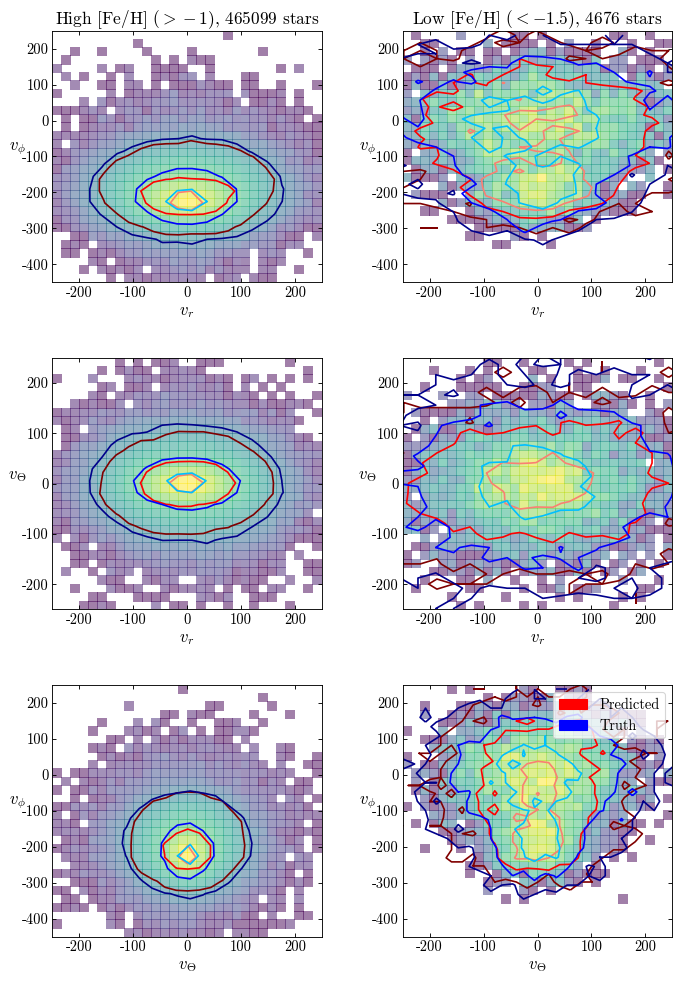

In [70]:
plot_contours_no_z_selection(ellipse_df)

### import matplotlib.pyplot as plt
import numpy as np; np.random.seed(10)
import seaborn as sns
import seaborn.distributions as sd
from seaborn.palettes import color_palette, blend_palette
from six import string_types


def _bivariate_kdeplot(x, y, filled, fill_lowest,
                       kernel, bw, gridsize, cut, clip,
                       axlabel, cbar, cbar_ax, cbar_kws, ax, **kwargs):
    """Plot a joint KDE estimate as a bivariate contour plot."""
    # Determine the clipping
    if clip is None:
        clip = [(-np.inf, np.inf), (-np.inf, np.inf)]
    elif np.ndim(clip) == 1:
        clip = [clip, clip]

    # Calculate the KDE
    if sd._has_statsmodels:
        xx, yy, z = sd._statsmodels_bivariate_kde(x, y, bw, gridsize, cut, clip)
    else:
        xx, yy, z = sd._scipy_bivariate_kde(x, y, bw, gridsize, cut, clip)

    # Plot the contours
    n_levels = kwargs.pop("n_levels", 10)
    cmap = kwargs.get("cmap", "BuGn" if filled else "BuGn_d")
    if isinstance(cmap, string_types):
        if cmap.endswith("_d"):
            pal = ["#333333"]
            pal.extend(color_palette(cmap.replace("_d", "_r"), 2))
            cmap = blend_palette(pal, as_cmap=True)
        else:
            cmap = plt.cm.get_cmap(cmap)

    kwargs["cmap"] = cmap
    contour_func = ax.contourf if filled else ax.contour
    cset = contour_func(xx, yy, z, n_levels, **kwargs)
    if filled and not fill_lowest:
        cset.collections[0].set_alpha(0)
    kwargs["n_levels"] = n_levels

    if cbar:
        cbar_kws = {} if cbar_kws is None else cbar_kws
        ax.figure.colorbar(cset, cbar_ax, ax, **cbar_kws)

    # Label the axes
    if hasattr(x, "name") and axlabel:
        ax.set_xlabel(x.name)
    if hasattr(y, "name") and axlabel:
        ax.set_ylabel(y.name)

    return ax, cset

# monkey patching
sd._bivariate_kdeplot = _bivariate_kdeplot

In [36]:
import TransformCoords
cols = ['vr_pred','vth_pred','vphi_pred','sigma_vr','sigma_vth','sigma_vphi','vlos_pred','sigma_los','vr_true','vth_true','vphi_true', 'vlos_true','feh','z']

In [37]:

from tqdm import tqdm_notebook as tqdm

In [38]:
def monte_carlo(ellipse_df_full):
    from tqdm import tqdm
    from matplotlib.colors import LogNorm
    y_low = -250
    y_high = 250
    mc_vr_pred_list = []
    mc_pred_list_vr = []
    mc_pred_list_vth = []
    mc_pred_list_vphi = []
    resample_test_list = []
    bin_values_list = []
    min_array = []
    max_array = []
    min_array_r = []
    max_array_r = []
    min_array_th = []
    max_array_th = []
    min_array_phi = []
    max_array_phi = []

    hb_list = []
    hb_list_vr_vphi = []
    hb_list_vr_vth = []
    hb_list_vth_vphi = []
    hex_centers = []

    bin_values_list_r = []
    bin_values_list_th = []
    bin_values_list_phi = []

    N = len((ellipse_df_full['vlos_pred']).values)
    x_range = np.linspace(y_low,y_high,N)
    test_preds =ellipse_df_full[['vlos_pred', 'sigma_los']].to_numpy()
    for mc_i in tqdm(range(0,10)):
        mc_vr_pred = []
        resample_test = []
        for star_i in range(0,len(test_preds)):
            mc_vr_pred.append(np.random.normal(test_preds[star_i,0],test_preds[star_i,1]))

        mc_vr_pred_list.append(mc_vr_pred)
        resample_test_list.append(resample_test)
        n, bins = np.histogram(mc_vr_pred,bins=50,range=(y_low,y_high), density = True)
        n_test_preds, bins_test_preds = np.histogram((ellipse_df_full['vlos_true']).values, bins=50, range=(y_low,y_high))

        plt.figure(2)
        hb = plt.hexbin((ellipse_df_full['vlos_true']).values, mc_vr_pred,gridsize=100, norm = LogNorm(),extent=[-200, 200, -200, 200]);
        hb_list.append(hb.get_array());
        bin_values_list.append(n)

        #now for the coordinate-transformed histograms
        vel_sph_coord = get_coord_transform(ellipse_df_full, np.array(mc_vr_pred).flatten().astype('float'))
        n_r , bins_r = np.histogram(vel_sph_coord[:,0], bins=50, range=(-250,250), density = True)
        n_th , bins_th = np.histogram(vel_sph_coord[:,1], bins=50, range=(-250,250), density = True)
        n_phi , bins_phi = np.histogram(vel_sph_coord[:,2], bins=50, range=(-450,0), density = True)
        bin_values_list_r.append(n_r)
        bin_values_list_th.append(n_th)
        bin_values_list_phi.append(n_phi)
        mc_pred_list_vr.append(vel_sph_coord[:,0])
        mc_pred_list_vth.append(vel_sph_coord[:,1])
        mc_pred_list_vphi.append(vel_sph_coord[:,2])

        hb_vr_vphi = plt.hexbin(vel_sph_coord[:,0],vel_sph_coord[:,2],gridsize=100, norm = LogNorm(),extent=[-250, 250, -450, 250]);
        hb_list_vr_vphi.append(hb_vr_vphi.get_array());


        hb_vr_vth = plt.hexbin(vel_sph_coord[:,0], vel_sph_coord[:,1],gridsize=100, norm = LogNorm(),extent=[-250, 250, -250, 250]);
        hb_list_vr_vth.append(hb_vr_vth.get_array());


        hb_vth_vphi = plt.hexbin(vel_sph_coord[:,1], vel_sph_coord[:,2],gridsize=100, norm = LogNorm(),extent=[-250, 250, -450, 250]);
        hb_list_vth_vphi.append(hb_vth_vphi.get_array());
        plt.close(2)


    return hb_list_vr_vphi, hb_list_vr_vth, hb_list_vth_vphi


In [65]:
levels = 1.0 - np.exp(-0.5 * np.arange(0.5, 3.1, 0.5) ** 2)
print(np.arange(0.5, 3.1, 0.5))
print(levels)

[0.5 1.  1.5 2.  2.5 3. ]
[0.1175031  0.39346934 0.67534753 0.86466472 0.95606307 0.988891  ]


In [39]:
def get_coord_transform(df, train_preds):
    #needs only vr values of train_preds (maybe...need to see what to do about error)

    v_LSR = [11.1, 239.08, 7.25]
    r_LSR = [-8.,0.,0.015]

    sin_theta_gc, sin_phi_gc ,cos_theta_gc, cos_phi_gc= TransformCoords.calc_theta_phi(np.deg2rad(df['ra'].values),np.deg2rad(df['dec'].values),np.deg2rad(df['b'].values),np.deg2rad(df['l'].values), df['parallax'].values ,train_preds.astype(np.float32))
    vr_gc, vth_gc, vphi_gc = TransformCoords.cart_to_galcen(np.deg2rad(df['ra'].values),np.deg2rad(df['dec'].values), np.deg2rad(df['b'].values) ,np.deg2rad(df['l'].values), df['parallax'].values,train_preds.astype(np.float32), df['pmra'].values, df['pmdec'].values,sin_theta_gc, sin_phi_gc, cos_theta_gc, cos_phi_gc)

    vels_sph_pred_train = np.array([vr_gc, vth_gc, vphi_gc]).T
    return vels_sph_pred_train

In [58]:
from matplotlib.colors import LogNorm
def plot_2dhists_pred(ellipse_df):
    idx_lowmet_highz = np.where((ellipse_df.feh <= -1.5) & ((ellipse_df.z > 1.5) | (ellipse_df.z < -1.5)))
    ellipse_df_lowmet_highz = ellipse_df.loc[idx_lowmet_highz]
    print(ellipse_df_lowmet_highz.shape)
    
    idx_lowmet_lowz = np.where((ellipse_df.feh <= -1.5) & ((ellipse_df.z < 1.5) & (ellipse_df.z > -1.5)))
    ellipse_df_lowmet_lowz = ellipse_df.loc[idx_lowmet_lowz]
    print(ellipse_df_lowmet_lowz.shape)
    
    idx_highmet_highz = np.where((ellipse_df.feh > -1) & ((ellipse_df.z > 1.5) | (ellipse_df.z < -1.5)))
    ellipse_df_highmet_highz = ellipse_df.loc[idx_highmet_highz]
    print(ellipse_df_highmet_highz.shape)
    
    idx_highmet_lowz = np.where((ellipse_df.feh > -1) & ((ellipse_df.z < 1.5) & (ellipse_df.z > -1.5)))
    ellipse_df_highmet_lowz = ellipse_df.loc[idx_highmet_lowz]
    print(ellipse_df_highmet_lowz.shape)
    
    fig, ax = plt.subplots(nrows=3, ncols=4, sharex=False, sharey=False,figsize=(20,15))
    plt.subplots_adjust(wspace = 0.3, hspace = 0.3)
    
    vr_vphi_lowmet_highz, vr_vth_lowmet_highz, vth_vphi_lowmet_highz = monte_carlo(ellipse_df_lowmet_highz)
    print(np.shape(vr_vphi_lowmet_highz))
    vr_vphi_lowmet_lowz, vr_vth_lowmet_lowz, vth_vphi_lowmet_lowz = monte_carlo(ellipse_df_lowmet_lowz)
    vr_vphi_highmet_highz, vr_vth_highmet_highz, vth_vphi_highmet_highz = monte_carlo(ellipse_df_highmet_highz)
    vr_vphi_highmet_lowz, vr_vth_highmet_lowz, vth_vphi_highmet_lowz = monte_carlo(ellipse_df_highmet_lowz)
    
    ## MC FOR VR, VPHI
    h1 = ax[0,0].hexbin(ellipse_df_highmet_highz['vr_pred'].values, ellipse_df_highmet_highz['vphi_pred'].values, gridsize=100, norm = LogNorm(),cmap="YlOrRd",extent=[-250, 250, -450, 250])
    sns.kdeplot(ellipse_df_highmet_highz['vr_true'].values,ellipse_df_highmet_highz['vphi_true'].values, cmap="Blues", shade=False,ax=ax[0,0])
    h1.set_array(np.mean(vr_vphi_highmet_highz, axis = 0))
    h1.set_clim(1,(np.max(vr_vphi_highmet_highz)/2)*1.5)
    clb1 = plt.colorbar(h1,ax = ax[0,0])
    clb1.set_label('Density', labelpad=-25, y=1.08, rotation=0,fontsize=10)
    #ax[0,0].set_xlim(-250, 250);
    #ax[0,0].set_ylim(-450, 250)
    ax[0,0].set_xlim(-75,75);
    ax[0,0].set_ylim(-300,-150);
    ax[0,0].set_xlabel(r'$v_{r}$')
    ax[0,0].set_ylabel('$v_{\phi}$')
    
    h2 = ax[0,1].hexbin(ellipse_df_highmet_lowz['vr_pred'].values, ellipse_df_highmet_lowz['vphi_pred'].values, gridsize=100, norm = LogNorm(),cmap="YlOrRd",extent=[-250, 250, -450, 250])
    h2.set_array(np.mean(vr_vphi_highmet_lowz, axis = 0))
    h2.set_clim(1,(np.max(vr_vphi_highmet_lowz)/2)*1.5)
    clb2 = plt.colorbar(h2,ax = ax[0,1])
    clb2.set_label('Density', labelpad=-25, y=1.08, rotation=0,fontsize=10)
    sns.kdeplot(ellipse_df_highmet_lowz['vr_true'].values,ellipse_df_highmet_lowz['vphi_true'].values, cmap="Blues", shade=False,ax=ax[0,1])
    #ax[0,1].set_xlim(-250, 250);
    #ax[0,1].set_ylim(-450, 250)
    ax[0,1].set_xlim(-75,75);
    ax[0,1].set_ylim(-300,-150);
    ax[0,1].set_xlabel(r'$v_{r}$')
    ax[0,1].set_ylabel('$v_{\phi}$')
    
    h3 = ax[0,2].hexbin(ellipse_df_lowmet_highz['vr_pred'].values, ellipse_df_lowmet_highz['vphi_pred'].values, gridsize=100, norm = LogNorm(),cmap="YlOrRd",extent=[-250, 250, -450, 250])
    h3.set_array(np.mean(vr_vphi_lowmet_highz, axis = 0))
    h3.set_clim(1,(np.max(vr_vphi_lowmet_highz)/2)*1.5)
    clb3 = plt.colorbar(h3,ax = ax[0,2])
    clb3.set_label('Density', labelpad=-25, y=1.08, rotation=0,fontsize=10)
    sns.kdeplot(ellipse_df_lowmet_highz['vr_true'].values,ellipse_df_lowmet_highz['vphi_true'].values, cmap="Blues", shade=False,ax=ax[0,2])
    ax[0,2].set_xlim(-250, 250);
    ax[0,2].set_ylim(-450, 250)
    ax[0,2].set_xlabel(r'$v_{r}$')
    ax[0,2].set_ylabel('$v_{\phi}$')
    
    h4 = ax[0,3].hexbin(ellipse_df_lowmet_lowz['vr_pred'].values, ellipse_df_lowmet_lowz['vphi_pred'].values, gridsize=100, norm = LogNorm(),cmap="YlOrRd",extent=[-250, 250, -450, 250])
    h4.set_array(np.mean(vr_vphi_lowmet_lowz, axis = 0))
    h4.set_clim(1,(np.max(vr_vphi_lowmet_lowz)/2)*1.5)
    clb4 = plt.colorbar(h4,ax = ax[0,3])
    clb4.set_label('Density', labelpad=-25, y=1.08, rotation=0,fontsize=10)
    sns.kdeplot(ellipse_df_lowmet_lowz['vr_true'].values,ellipse_df_lowmet_lowz['vphi_true'].values, cmap="Blues", shade=False,ax=ax[0,3])
    ax[0,3].set_xlim(-250, 250);
    ax[0,3].set_ylim(-450, 250)
    ax[0,3].set_xlabel(r'$v_{r}$')
    ax[0,3].set_ylabel('$v_{\phi}$')
    
    ## MC FOR VR, VTH
    h5 = ax[1,0].hexbin(ellipse_df_highmet_highz['vr_pred'].values, ellipse_df_highmet_highz['vth_pred'].values, gridsize=100, norm = LogNorm(),cmap="YlOrRd",extent=[-250, 250, -250, 250])
    sns.kdeplot(ellipse_df_highmet_highz['vr_true'].values,ellipse_df_highmet_highz['vth_true'].values, cmap="Blues", shade=False,ax=ax[1,0])
    h5.set_array(np.mean(vr_vth_highmet_highz, axis = 0))
    h5.set_clim(1,(np.max(vr_vth_highmet_highz)/2)*1.5)
    clb5 = plt.colorbar(h5,ax = ax[1,0])
    clb5.set_label('Density', labelpad=-25, y=1.08, rotation=0,fontsize=10)
    #ax[1,0].set_xlim(-250, 250);
    #ax[1,0].set_ylim(-250, 250)
    ax[1,0].set_xlim(-75,75);
    ax[1,0].set_ylim(-75,75);
    ax[1,0].set_xlabel(r'$v_{r}$')
    ax[1,0].set_ylabel('$v_{\Theta}$')
    
    h6 = ax[1,1].hexbin(ellipse_df_highmet_lowz['vr_pred'].values, ellipse_df_highmet_lowz['vth_pred'].values, gridsize=100, norm = LogNorm(),cmap="YlOrRd",extent=[-250, 250, -250, 250])
    sns.kdeplot(ellipse_df_highmet_lowz['vr_true'].values,ellipse_df_highmet_lowz['vth_true'].values, cmap="Blues", shade=False,ax=ax[1,1])
    h6.set_array(np.mean(vr_vth_highmet_lowz, axis = 0))
    h6.set_clim(1,(np.max(vr_vth_highmet_lowz)/2)*1.5)
    clb6 = plt.colorbar(h6,ax = ax[1,1])
    clb6.set_label('Density', labelpad=-25, y=1.08, rotation=0,fontsize=10)
    #ax[1,1].set_xlim(-250, 250);
    #ax[1,1].set_ylim(-250, 250)
    ax[1,1].set_xlim(-75,75);
    ax[1,1].set_ylim(-75,75);
    ax[1,1].set_xlabel(r'$v_{r}$')
    ax[1,1].set_ylabel('$v_{\Theta}$')
    
    h7 = ax[1,2].hexbin(ellipse_df_lowmet_highz['vr_pred'].values, ellipse_df_lowmet_highz['vth_pred'].values, gridsize=100, norm = LogNorm(),cmap="YlOrRd",extent=[-250, 250, -250, 250])
    sns.kdeplot(ellipse_df_lowmet_highz['vr_true'].values,ellipse_df_lowmet_highz['vth_true'].values, cmap="Blues", shade=False,ax=ax[1,2])
    h7.set_array(np.mean(vr_vth_lowmet_highz, axis = 0))
    h7.set_clim(1,(np.max(vr_vth_lowmet_highz)/2)*1.5)
    clb7 = plt.colorbar(h7,ax = ax[1,2])
    clb7.set_label('Density', labelpad=-25, y=1.08, rotation=0,fontsize=10)
    ax[1,2].set_xlim(-250, 250);
    ax[1,2].set_ylim(-250, 250)
    ax[1,2].set_xlabel(r'$v_{r}$')
    ax[1,2].set_ylabel('$v_{\Theta}$')
    
    h8 = ax[1,3].hexbin(ellipse_df_lowmet_lowz['vr_pred'].values, ellipse_df_lowmet_lowz['vth_pred'].values, gridsize=100, norm = LogNorm(),cmap="YlOrRd",extent=[-250, 250, -250, 250])
    sns.kdeplot(ellipse_df_lowmet_lowz['vr_true'].values,ellipse_df_lowmet_lowz['vth_true'].values, cmap="Blues", shade=False,ax=ax[1,3])
    h8.set_array(np.mean(vr_vth_lowmet_lowz, axis = 0))
    h8.set_clim(1,(np.max(vr_vth_lowmet_lowz)/2)*1.5)
    clb8 = plt.colorbar(h8,ax = ax[1,3])
    clb8.set_label('Density', labelpad=-25, y=1.08, rotation=0,fontsize=10)
    ax[1,3].set_xlim(-250, 250);
    ax[1,3].set_ylim(-250, 250)
    ax[1,3].set_xlabel(r'$v_{r}$')
    ax[1,3].set_ylabel('$v_{\Theta}$')
    
    ## MC FOR VTH, VPHI
    h9 = ax[2,0].hexbin(ellipse_df_highmet_highz['vth_pred'].values, ellipse_df_highmet_highz['vphi_pred'].values, gridsize=100, norm = LogNorm(),cmap="YlOrRd",extent=[-250, 250, -450, 250])
    sns.kdeplot(ellipse_df_highmet_highz['vth_true'].values,ellipse_df_highmet_highz['vphi_true'].values, cmap="Blues", shade=False,ax=ax[2,0])
    h9.set_array(np.mean(vth_vphi_highmet_highz, axis = 0))
    h9.set_clim(1,(np.max(vth_vphi_highmet_highz)/2)*1.5)
    clb9 = plt.colorbar(h9,ax = ax[2,0])
    clb9.set_label('Density', labelpad=-25, y=1.08, rotation=0,fontsize=10)
    #ax[2,0].set_xlim(-250, 250);
    #ax[2,0].set_ylim(-450, 250)
    ax[2,0].set_xlim(-75,75);
    ax[2,0].set_ylim(-300,-150);
    ax[2,0].set_xlabel(r'$v_{\Theta}$')
    ax[2,0].set_ylabel('$v_{\phi}$')
    
    h10 = ax[2,1].hexbin(ellipse_df_highmet_lowz['vth_pred'].values, ellipse_df_highmet_lowz['vphi_pred'].values, gridsize=100, norm = LogNorm(),cmap="YlOrRd",extent=[-250, 250, -450, 250])
    sns.kdeplot(ellipse_df_highmet_lowz['vth_true'].values,ellipse_df_highmet_lowz['vphi_true'].values, cmap="Blues", shade=False,ax=ax[2,1])
    h10.set_array(np.mean(vth_vphi_highmet_lowz, axis = 0))
    h10.set_clim(1,(np.max(vth_vphi_highmet_lowz)/2)*1.5)
    clb10 = plt.colorbar(h10,ax = ax[2,1])
    clb10.set_label('Density', labelpad=-25, y=1.08, rotation=0,fontsize=10)
    #ax[2,1].set_xlim(-250, 250);
    #ax[2,1].set_ylim(-450, 250)
    ax[2,1].set_xlim(-75,75);
    ax[2,1].set_ylim(-300,-150);
    ax[2,1].set_xlabel(r'$v_{\Theta}$')
    ax[2,1].set_ylabel('$v_{\phi}$')
    
    h11 = ax[2,2].hexbin(ellipse_df_lowmet_highz['vth_pred'].values, ellipse_df_lowmet_highz['vphi_pred'].values, gridsize=100, norm = LogNorm(),cmap="YlOrRd",extent=[-250, 250, -450, 250])
    sns.kdeplot(ellipse_df_lowmet_highz['vth_true'].values,ellipse_df_lowmet_highz['vphi_true'].values, cmap="Blues", shade=False,ax=ax[2,2])
    h11.set_array(np.mean(vth_vphi_lowmet_highz, axis = 0))
    h11.set_clim(1,(np.max(vth_vphi_lowmet_highz)/2)*1.5)
    clb11 = plt.colorbar(h11,ax = ax[2,2])
    clb11.set_label('Density', labelpad=-25, y=1.08, rotation=0,fontsize=10)
    ax[2,2].set_xlim(-250, 250);
    ax[2,2].set_ylim(-450, 250)
    ax[2,2].set_xlabel(r'$v_{\Theta}$')
    ax[2,2].set_ylabel('$v_{\phi}$')
    
    h12 = ax[2,3].hexbin(ellipse_df_lowmet_lowz['vth_pred'].values, ellipse_df_lowmet_lowz['vphi_pred'].values, gridsize=100, norm = LogNorm(),cmap="YlOrRd",extent=[-250, 250, -450, 250])
    sns.kdeplot(ellipse_df_lowmet_lowz['vth_true'].values,ellipse_df_lowmet_lowz['vphi_true'].values, cmap="Blues", shade=False,ax=ax[2,3])
    h12.set_array(np.mean(vth_vphi_lowmet_lowz, axis = 0))
    h12.set_clim(1,(np.max(vth_vphi_lowmet_lowz)/2)*1.5)
    clb12 = plt.colorbar(h11,ax = ax[2,3])
    clb12.set_label('Density', labelpad=-25, y=1.08, rotation=0,fontsize=10)
    ax[2,3].set_xlim(-250, 250);
    ax[2,3].set_ylim(-450, 250)
    ax[2,3].set_xlabel(r'$v_{\Theta}$')
    ax[2,3].set_ylabel('$v_{\phi}$')
    
    ax[0,0].set_title("High z ($|z| > 1.5$), High [Fe/H] ($> -1$),\n "+ str(ellipse_df_highmet_highz.shape[0])+" stars")
    ax[0,1].set_title("Low z ($|z| < 1.5$), High [Fe/H] ($> -1$),\n "+ str(ellipse_df_highmet_lowz.shape[0])+" stars")
    ax[0,2].set_title("High z($|z| > 1.5$), Low [Fe/H] ($< -1.5$),\n "+ str(ellipse_df_lowmet_highz.shape[0])+" stars")
    ax[0,3].set_title("Low z ($|z| < 1.5$), Low [Fe/H] ($< -1.5$),\n "+ str(ellipse_df_lowmet_lowz.shape[0])+" stars")
    red_patch = mpatches.Patch(color='red', label='Predicted')
    blue_patch = mpatches.Patch(color='blue', label='Truth')
    plt.legend(handles=[red_patch,blue_patch], ncol = 1)
    fig.savefig('G_train_2it_500000_tanh_D30_nodropout_seed1test1_lbppp_log2d_newtm/mc_pred_contour_truths_zoom_z1p5.png')
    

  0%|          | 0/10 [00:00<?, ?it/s]

(350, 21)
(1017, 21)
(54138, 21)
(429654, 21)


 20%|██        | 2/10 [00:00<00:00, 13.36it/s]

(10, 11558)


100%|██████████| 10/10 [04:02<00:00, 24.21s/it]


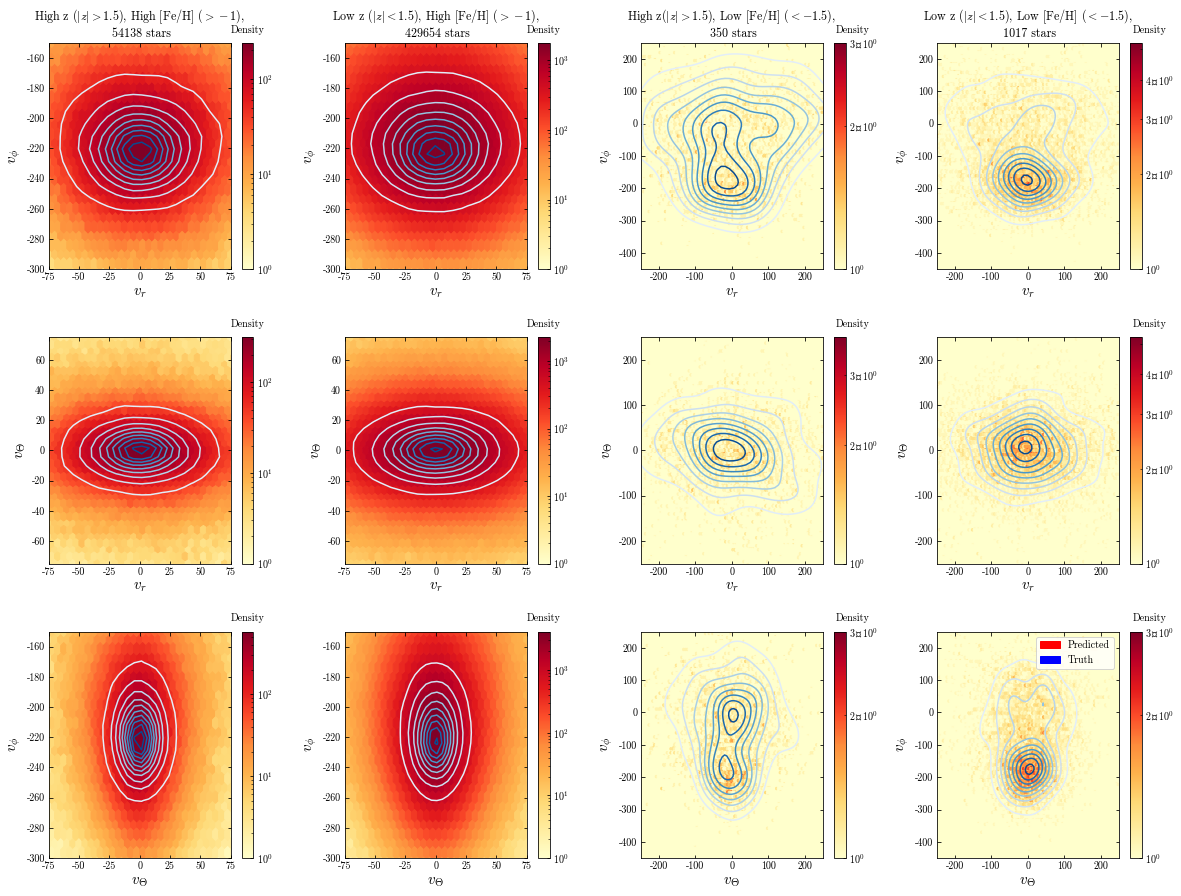

In [59]:
%matplotlib inline
plot_2dhists_pred(ellipse_df)

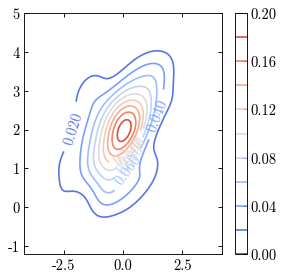

In [21]:
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(10)
import seaborn as sns
import seaborn.distributions as sd
from seaborn.palettes import color_palette, blend_palette
from six import string_types


def _bivariate_kdeplot(x, y, filled, fill_lowest,
                       kernel, bw, gridsize, cut, clip,
                       axlabel, cbar, cbar_ax, cbar_kws, ax, **kwargs):
    """Plot a joint KDE estimate as a bivariate contour plot."""
    # Determine the clipping
    if clip is None:
        clip = [(-np.inf, np.inf), (-np.inf, np.inf)]
    elif np.ndim(clip) == 1:
        clip = [clip, clip]

    # Calculate the KDE
    if sd._has_statsmodels:
        xx, yy, z = sd._statsmodels_bivariate_kde(x, y, bw, gridsize, cut, clip)
    else:
        xx, yy, z = sd._scipy_bivariate_kde(x, y, bw, gridsize, cut, clip)

    # Plot the contours
    n_levels = kwargs.pop("n_levels", 10)
    cmap = kwargs.get("cmap", "BuGn" if filled else "BuGn_d")
    if isinstance(cmap, string_types):
        if cmap.endswith("_d"):
            pal = ["#333333"]
            pal.extend(color_palette(cmap.replace("_d", "_r"), 2))
            cmap = blend_palette(pal, as_cmap=True)
        else:
            cmap = plt.cm.get_cmap(cmap)

    kwargs["cmap"] = cmap
    contour_func = ax.contourf if filled else ax.contour
    cset = contour_func(xx, yy, z, n_levels, **kwargs)
    if filled and not fill_lowest:
        cset.collections[0].set_alpha(0)
    kwargs["n_levels"] = n_levels

    if cbar:
        cbar_kws = {} if cbar_kws is None else cbar_kws
        ax.figure.colorbar(cset, cbar_ax, ax, **cbar_kws)

    # Label the axes
    if hasattr(x, "name") and axlabel:
        ax.set_xlabel(x.name)
    if hasattr(y, "name") and axlabel:
        ax.set_ylabel(y.name)

    return ax, cset

# monkey patching
sd._bivariate_kdeplot = _bivariate_kdeplot

# some data
mean, cov = [0, 2], [(1, .5), (.5, 1)]
x, y = np.random.multivariate_normal(mean, cov, size=50).T

# plot
fig, ax = plt.subplots()
_, cs = sns.kdeplot(x, y, ax=ax, cmap="coolwarm")
# label the contours
plt.clabel(cs, cs.levels, inline=True)
# add a colorbar
fig.colorbar(cs)

plt.show()

In [105]:
def plot_hists_vphi(ellipse_df):
    idx_lowmet_highz = np.where((ellipse_df.feh <= -1.5) & ((ellipse_df.z > 1.5) | (ellipse_df.z < -1.5)))
    ellipse_df_lowmet_highz = ellipse_df.loc[idx_lowmet_highz]
    print(ellipse_df_lowmet_highz.shape)
    
    idx_lowmet_lowz = np.where((ellipse_df.feh <= -1.5) & ((ellipse_df.z < 1.5) & (ellipse_df.z > -1.5)))
    ellipse_df_lowmet_lowz = ellipse_df.loc[idx_lowmet_lowz]
    print(ellipse_df_lowmet_lowz.shape)
    
    idx_highmet_highz = np.where((ellipse_df.feh > -1) & ((ellipse_df.z > 1.5) | (ellipse_df.z < -1.5)))
    ellipse_df_highmet_highz = ellipse_df.loc[idx_highmet_highz]
    print(ellipse_df_highmet_highz.shape)
    
    idx_highmet_lowz = np.where((ellipse_df.feh > -1) & ((ellipse_df.z < 1.5) & (ellipse_df.z > -1.5)))
    ellipse_df_highmet_lowz = ellipse_df.loc[idx_highmet_lowz]
    print(ellipse_df_highmet_lowz.shape)
    
    idx_highz1 = np.where( (ellipse_df.feh > -1) &((ellipse_df.z > 1) | (ellipse_df.z < -1)))
    ellipse_df_highz1 = ellipse_df.loc[idx_highz1]
    
    idx_lowz1 = np.where((ellipse_df.feh > -1) &((ellipse_df.z < 1) & (ellipse_df.z > -1)))
    ellipse_df_lowz1 = ellipse_df.loc[idx_lowz1]
    
    idx_highz1p5 = np.where((ellipse_df.feh > -1) & ((ellipse_df.z > 1.5) | (ellipse_df.z < -1.5)))
    ellipse_df_highz1p5 = ellipse_df.loc[idx_highz1p5]
    
    idx_lowz1p5 = np.where((ellipse_df.feh > -1) &((ellipse_df.z < 1.5) & (ellipse_df.z > -1.5)))
    ellipse_df_lowz1p5 = ellipse_df.loc[idx_lowz1p5]

    idx_highz2 = np.where( (ellipse_df.feh > -1) &((ellipse_df.z > 2) | (ellipse_df.z < -2)))
    ellipse_df_highz2 = ellipse_df.loc[idx_highz2]
    
    idx_lowz2 = np.where((ellipse_df.feh > -1) &((ellipse_df.z < 2) & (ellipse_df.z > -2)))
    ellipse_df_lowz2 = ellipse_df.loc[idx_lowz2]
    
    idx_highz3 = np.where((ellipse_df.feh > -1) & ((ellipse_df.z > 3) | (ellipse_df.z < -3)))
    ellipse_df_highz3 = ellipse_df.loc[idx_highz3]
    
    idx_lowz3 = np.where((ellipse_df.feh > -1) &((ellipse_df.z < 3) & (ellipse_df.z > -3)))
    ellipse_df_lowz3 = ellipse_df.loc[idx_lowz3]
    
    idx_highz4 = np.where( (ellipse_df.feh > -1) &((ellipse_df.z > 4) | (ellipse_df.z < -4)))
    ellipse_df_highz4 = ellipse_df.loc[idx_highz4]
    
    idx_lowz4 = np.where((ellipse_df.feh > -1) &((ellipse_df.z < 4) & (ellipse_df.z > -4)))
    ellipse_df_lowz4 = ellipse_df.loc[idx_lowz4]
    
    idx_highz5 = np.where((ellipse_df.feh > -1) & ((ellipse_df.z > 5) | (ellipse_df.z < -5)))
    ellipse_df_highz5 = ellipse_df.loc[idx_highz5]
    
    idx_lowz5 = np.where((ellipse_df.feh > -1) &((ellipse_df.z < 5) & (ellipse_df.z > -5)))
    ellipse_df_lowz5 = ellipse_df.loc[idx_lowz5]
    
    idx_highz6 = np.where((ellipse_df.feh > -1) & ((ellipse_df.z > 6) | (ellipse_df.z < -6)))
    ellipse_df_highz6 = ellipse_df.loc[idx_highz6]
    
    idx_lowz6 = np.where((ellipse_df.feh > -1) &((ellipse_df.z < 6) & (ellipse_df.z > -6)))
    ellipse_df_lowz6 = ellipse_df.loc[idx_lowz6]
    
    idx_highz8 = np.where((ellipse_df.feh > -1) & ((ellipse_df.z > 8) | (ellipse_df.z < -8)))
    ellipse_df_highz8 = ellipse_df.loc[idx_highz8]
    
    idx_lowz8 = np.where((ellipse_df.feh > -1) &((ellipse_df.z < 8) & (ellipse_df.z > -8)))
    ellipse_df_lowz8 = ellipse_df.loc[idx_lowz8]
    y_low = -450
    y_high = 250
    
    fig, ax = plt.subplots(nrows=4, ncols=4, sharex=False, sharey=False,figsize=(20,20))
    plt.subplots_adjust(wspace = 0.3, hspace = 0.3)
    
    ax[0,0].hist(ellipse_df_highz1['vphi_pred'].values, color = "red",alpha = 0.5,bins=50, range=(y_low,y_high), label = "Predicted", density = False)
    ax[0,0].hist(ellipse_df_highz1['vphi_true'].values, color = "blue",alpha = 0.5,bins=50, range=(y_low,y_high), label = "Truth", density = False)
    ax[0,0].set_xlabel(r'$v_{\phi}, |z| > 1$, '+str(ellipse_df_highz1.shape[0])+" stars")
    
    ax[1,0].hist(ellipse_df_lowz1['vphi_pred'].values, color = "red",alpha = 0.5,bins=50, range=(y_low,y_high), label = "Predicted", density = False)
    ax[1,0].hist(ellipse_df_lowz1['vphi_true'].values, color = "blue",alpha = 0.5,bins=50, range=(y_low,y_high), label = "Truth", density = False)
    ax[1,0].set_xlabel(r'$v_{\phi}, |z| < 1$, '+str(ellipse_df_lowz1.shape[0])+" stars")
    
    ax[0,1].hist(ellipse_df_highz1p5['vphi_pred'].values, color = "red",alpha = 0.5,bins=50, range=(y_low,y_high), label = "Predicted", density = False)
    ax[0,1].hist(ellipse_df_highz1p5['vphi_true'].values, color = "blue",alpha = 0.5,bins=50, range=(y_low,y_high), label = "Truth", density = False)
    ax[0,1].set_xlabel(r'$v_{\phi}, |z| > 1.5$, '+str(ellipse_df_highz1p5.shape[0])+" stars")
    
    ax[1,1].hist(ellipse_df_lowz1p5['vphi_pred'].values, color = "red",alpha = 0.5,bins=50, range=(y_low,y_high), label = "Predicted", density = False)
    ax[1,1].hist(ellipse_df_lowz1p5['vphi_true'].values, color = "blue",alpha = 0.5,bins=50, range=(y_low,y_high), label = "Truth", density = False)
    ax[1,1].set_xlabel(r'$v_{\phi}, |z| < 1.5$, '+str(ellipse_df_lowz1p5.shape[0])+" stars")
    
    ax[0,2].hist(ellipse_df_highz2['vphi_pred'].values, color = "red",alpha = 0.5,bins=50, range=(y_low,y_high), label = "Predicted", density = False)
    ax[0,2].hist(ellipse_df_highz2['vphi_true'].values, color = "blue",alpha = 0.5,bins=50, range=(y_low,y_high), label = "Truth", density = False)
    ax[0,2].set_xlabel(r'$v_{\phi}, |z| > 2$, '+str(ellipse_df_highz2.shape[0])+" stars")
    
    ax[1,2].hist(ellipse_df_lowz2['vphi_pred'].values, color = "red",alpha = 0.5,bins=50, range=(y_low,y_high), label = "Predicted", density = False)
    ax[1,2].hist(ellipse_df_lowz2['vphi_true'].values, color = "blue",alpha = 0.5,bins=50, range=(y_low,y_high), label = "Truth", density = False)
    ax[1,2].set_xlabel(r'$v_{\phi}, |z| < 2$, '+str(ellipse_df_lowz2.shape[0])+" stars")
    
    ax[0,3].hist(ellipse_df_highz3['vphi_pred'].values, color = "red",alpha = 0.5,bins=50, range=(y_low,y_high), label = "Predicted", density = False)
    ax[0,3].hist(ellipse_df_highz3['vphi_true'].values, color = "blue",alpha = 0.5,bins=50, range=(y_low,y_high), label = "Truth", density = False)
    ax[0,3].set_xlabel(r'$v_{\phi}, |z| > 3$, '+str(ellipse_df_highz3.shape[0])+" stars")
    
    ax[1,3].hist(ellipse_df_lowz3['vphi_pred'].values, color = "red",alpha = 0.5,bins=50, range=(y_low,y_high), label = "Predicted", density = False)
    ax[1,3].hist(ellipse_df_lowz3['vphi_true'].values, color = "blue",alpha = 0.5,bins=50, range=(y_low,y_high), label = "Truth", density = False)
    ax[1,3].set_xlabel(r'$v_{\phi}, |z| < 3$, '+str(ellipse_df_lowz3.shape[0])+" stars")
    
    ax[2,0].hist(ellipse_df_highz4['vphi_pred'].values, color = "red",alpha = 0.5,bins=50, range=(y_low,y_high), label = "Predicted", density = False)
    ax[2,0].hist(ellipse_df_highz4['vphi_true'].values, color = "blue",alpha = 0.5,bins=50, range=(y_low,y_high), label = "Truth", density = False)
    ax[2,0].set_xlabel(r'$v_{\phi}, |z| > 4$, '+str(ellipse_df_highz4.shape[0])+" stars")
    
    ax[3,0].hist(ellipse_df_lowz4['vphi_pred'].values, color = "red",alpha = 0.5,bins=50, range=(y_low,y_high), label = "Predicted", density = False)
    ax[3,0].hist(ellipse_df_lowz4['vphi_true'].values, color = "blue",alpha = 0.5,bins=50, range=(y_low,y_high), label = "Truth", density = False)
    ax[3,0].set_xlabel(r'$v_{\phi}, |z| < 4$, '+str(ellipse_df_lowz4.shape[0])+" stars")
    
    ax[2,1].hist(ellipse_df_highz5['vphi_pred'].values, color = "red",alpha = 0.5,bins=50, range=(y_low,y_high), label = "Predicted", density = False)
    ax[2,1].hist(ellipse_df_highz5['vphi_true'].values, color = "blue",alpha = 0.5,bins=50, range=(y_low,y_high), label = "Truth", density = False)
    ax[2,1].set_xlabel(r'$v_{\phi}, |z| > 5$, '+str(ellipse_df_highz5.shape[0])+" stars")
    
    ax[3,1].hist(ellipse_df_lowz5['vphi_pred'].values, color = "red",alpha = 0.5,bins=50, range=(y_low,y_high), label = "Predicted", density = False)
    ax[3,1].hist(ellipse_df_lowz5['vphi_true'].values, color = "blue",alpha = 0.5,bins=50, range=(y_low,y_high), label = "Truth", density = False)
    ax[3,1].set_xlabel(r'$v_{\phi}, |z| < 5$, '+str(ellipse_df_lowz5.shape[0])+" stars")
    red_patch = mpatches.Patch(color='red', label='Predicted')
    blue_patch = mpatches.Patch(color='blue', label='Truth')
    
    ax[2,2].hist(ellipse_df_highz6['vphi_pred'].values, color = "red",alpha = 0.5,bins=50, range=(y_low,y_high), label = "Predicted", density = False)
    ax[2,2].hist(ellipse_df_highz6['vphi_true'].values, color = "blue",alpha = 0.5,bins=50, range=(y_low,y_high), label = "Truth", density = False)
    ax[2,2].set_xlabel(r'$v_{\phi}, |z| > 6$, '+str(ellipse_df_highz6.shape[0])+" stars")
    
    ax[3,2].hist(ellipse_df_lowz6['vphi_pred'].values, color = "red",alpha = 0.5,bins=50, range=(y_low,y_high), label = "Predicted", density = False)
    ax[3,2].hist(ellipse_df_lowz6['vphi_true'].values, color = "blue",alpha = 0.5,bins=50, range=(y_low,y_high), label = "Truth", density = False)
    ax[3,2].set_xlabel(r'$v_{\phi}, |z| < 6$, '+str(ellipse_df_lowz6.shape[0])+" stars")
    
    ax[2,3].hist(ellipse_df_highz8['vphi_pred'].values, color = "red",alpha = 0.5,bins=50, range=(y_low,y_high), label = "Predicted", density = False)
    ax[2,3].hist(ellipse_df_highz8['vphi_true'].values, color = "blue",alpha = 0.5,bins=50, range=(y_low,y_high), label = "Truth", density = False)
    ax[2,3].set_xlabel(r'$v_{\phi}, |z| > 8$, '+str(ellipse_df_highz8.shape[0])+" stars")
    
    ax[3,3].hist(ellipse_df_lowz8['vphi_pred'].values, color = "red",alpha = 0.5,bins=50, range=(y_low,y_high), label = "Predicted", density = False)
    ax[3,3].hist(ellipse_df_lowz8['vphi_true'].values, color = "blue",alpha = 0.5,bins=50, range=(y_low,y_high), label = "Truth", density = False)
    ax[3,3].set_xlabel(r'$v_{\phi}, |z| < 8$, '+str(ellipse_df_lowz8.shape[0])+" stars")
    red_patch = mpatches.Patch(color='red', label='Predicted')
    blue_patch = mpatches.Patch(color='blue', label='Truth')
    plt.legend(handles=[red_patch,blue_patch], ncol = 1)
    
    fig.savefig('G_train_2it_500000_tanh_D30_nodropout_seed1test1_lbppp_log2d_newtm/z_cut_comparison_HIGHMET.png')

(350, 21)
(1017, 21)
(54138, 21)
(429654, 21)


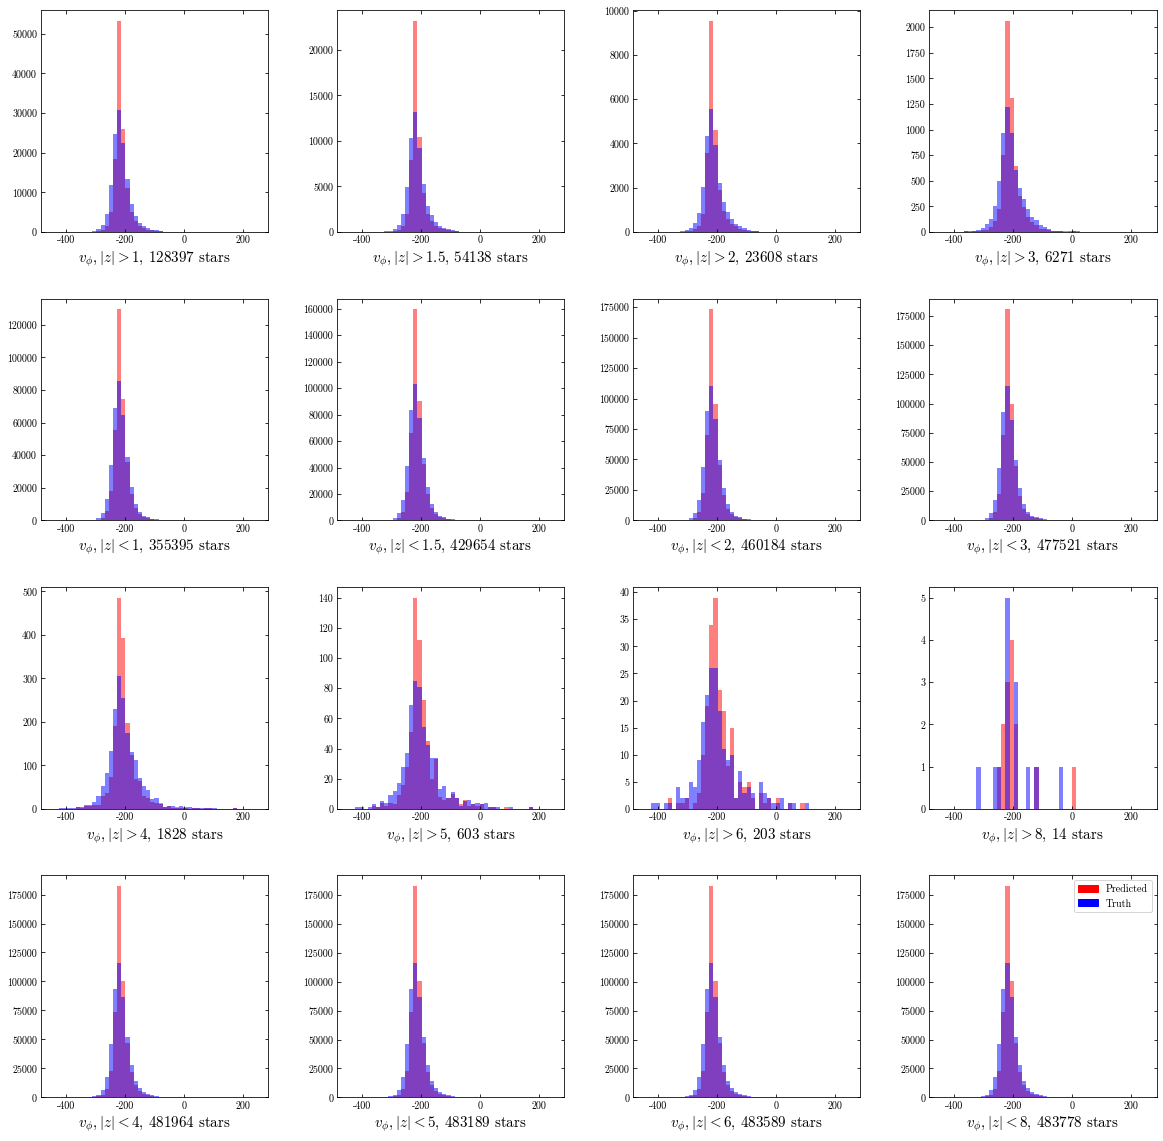

In [106]:
plot_hists_vphi(ellipse_df)

In [ ]:
    counts_vr_vph_pred_highmet_highz = np.histogram2d(ellipse_df_highmet_highz['vr_pred'].values,ellipse_df_highmet_highz['vphi_pred'].values,bins=[vrthbins,vphibins],density=True)[0];
    counts_vr_vph_true_highmet_highz = np.histogram2d(ellipse_df_highmet_highz['vr_true'].values,ellipse_df_highmet_highz['vphi_true'].values,bins=[vrthbins,vphibins],density=True)[0];
    counts_vr_vth_pred_highmet_highz = np.histogram2d(ellipse_df_highmet_highz['vr_pred'].values,ellipse_df_highmet_highz['vth_pred'].values,bins=[vrthbins,vrthbins],density=True)[0];
    counts_vr_vth_true_highmet_highz = np.histogram2d(ellipse_df_highmet_highz['vr_true'].values,ellipse_df_highmet_highz['vth_true'].values,bins=[vrthbins,vrthbins],density=True)[0];
    counts_vth_vphi_pred_highmet_highz = np.histogram2d(ellipse_df_highmet_highz['vth_pred'].values,ellipse_df_highmet_highz['vphi_pred'].values,bins=[vrthbins,vphibins],density=True)[0];
    counts_vth_vphi_true_highmet_highz = np.histogram2d(ellipse_df_highmet_highz['vth_true'].values,ellipse_df_highmet_highz['vphi_true'].values,bins=[vrthbins,vphibins],density=True)[0];
    
    counts_vr_vph_pred_highmet_lowz = np.histogram2d(ellipse_df_highmet_lowz['vr_pred'].values,ellipse_df_highmet_lowz['vphi_pred'].values,bins=[vrthbins,vphibins],density=True)[0];
    counts_vr_vph_true_highmet_lowz = np.histogram2d(ellipse_df_highmet_lowz['vr_true'].values,ellipse_df_highmet_lowz['vphi_true'].values,bins=[vrthbins,vphibins],density=True)[0];
    counts_vr_vth_pred_highmet_lowz = np.histogram2d(ellipse_df_highmet_lowz['vr_pred'].values,ellipse_df_highmet_lowz['vth_pred'].values,bins=[vrthbins,vrthbins],density=True)[0];
    counts_vr_vth_true_highmet_lowz = np.histogram2d(ellipse_df_highmet_lowz['vr_true'].values,ellipse_df_highmet_lowz['vth_true'].values,bins=[vrthbins,vrthbins],density=True)[0];
    counts_vth_vphi_pred_highmet_lowz = np.histogram2d(ellipse_df_highmet_lowz['vth_pred'].values,ellipse_df_highmet_lowz['vphi_pred'].values,bins=[vrthbins,vphibins],density=True)[0];
    counts_vth_vphi_true_highmet_lowz = np.histogram2d(ellipse_df_highmet_lowz['vth_true'].values,ellipse_df_highmet_lowz['vphi_true'].values,bins=[vrthbins,vphibins],density=True)[0];
    
    counts_vr_vph_pred_lowmet_highz = np.histogram2d(ellipse_df_lowmet_highz['vr_pred'].values,ellipse_df_lowmet_highz['vphi_pred'].values,bins=[vrthbins,vphibins],density=True)[0];
    counts_vr_vph_true_lowmet_highz = np.histogram2d(ellipse_df_lowmet_highz['vr_true'].values,ellipse_df_lowmet_highz['vphi_true'].values,bins=[vrthbins,vphibins],density=True)[0];
    counts_vr_vth_pred_lowmet_highz = np.histogram2d(ellipse_df_lowmet_highz['vr_pred'].values,ellipse_df_lowmet_highz['vth_pred'].values,bins=[vrthbins,vrthbins],density=True)[0];
    counts_vr_vth_true_lowmet_highz = np.histogram2d(ellipse_df_lowmet_highz['vr_true'].values,ellipse_df_lowmet_highz['vth_true'].values,bins=[vrthbins,vrthbins],density=True)[0];
    counts_vth_vphi_pred_lowmet_highz = np.histogram2d(ellipse_df_lowmet_highz['vth_pred'].values,ellipse_df_lowmet_highz['vphi_pred'].values,bins=[vrthbins,vphibins],density=True)[0];
    counts_vth_vphi_true_lowmet_highz = np.histogram2d(ellipse_df_lowmet_highz['vth_true'].values,ellipse_df_lowmet_highz['vphi_true'].values,bins=[vrthbins,vphibins],density=True)[0];
    
    counts_vr_vph_pred_lowmet_lowz = np.histogram2d(ellipse_df_lowmet_lowz['vr_pred'].values,ellipse_df_lowmet_lowz['vphi_pred'].values,bins=[vrthbins,vphibins],density=True)[0];
    counts_vr_vph_true_lowmet_lowz = np.histogram2d(ellipse_df_lowmet_lowz['vr_true'].values,ellipse_df_lowmet_lowz['vphi_true'].values,bins=[vrthbins,vphibins],density=True)[0];
    counts_vr_vth_pred_lowmet_lowz = np.histogram2d(ellipse_df_lowmet_lowz['vr_pred'].values,ellipse_df_lowmet_lowz['vth_pred'].values,bins=[vrthbins,vrthbins],density=True)[0];
    counts_vr_vth_true_lowmet_lowz = np.histogram2d(ellipse_df_lowmet_lowz['vr_true'].values,ellipse_df_lowmet_lowz['vth_true'].values,bins=[vrthbins,vrthbins],density=True)[0];
    counts_vth_vphi_pred_lowmet_lowz = np.histogram2d(ellipse_df_lowmet_lowz['vth_pred'].values,ellipse_df_lowmet_lowz['vphi_pred'].values,bins=[vrthbins,vphibins],density=True)[0];
    counts_vth_vphi_true_lowmet_lowz = np.histogram2d(ellipse_df_lowmet_lowz['vth_true'].values,ellipse_df_lowmet_lowz['vphi_true'].values,bins=[vrthbins,vphibins],density=True)[0];
    